<a href="https://colab.research.google.com/github/Tesmin-Varghese/ML-PROJECT/blob/main/HR_Analytics_My_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT**

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

* The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
* A sizeable department has to be maintained, for the purposes of recruiting new talent
* More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

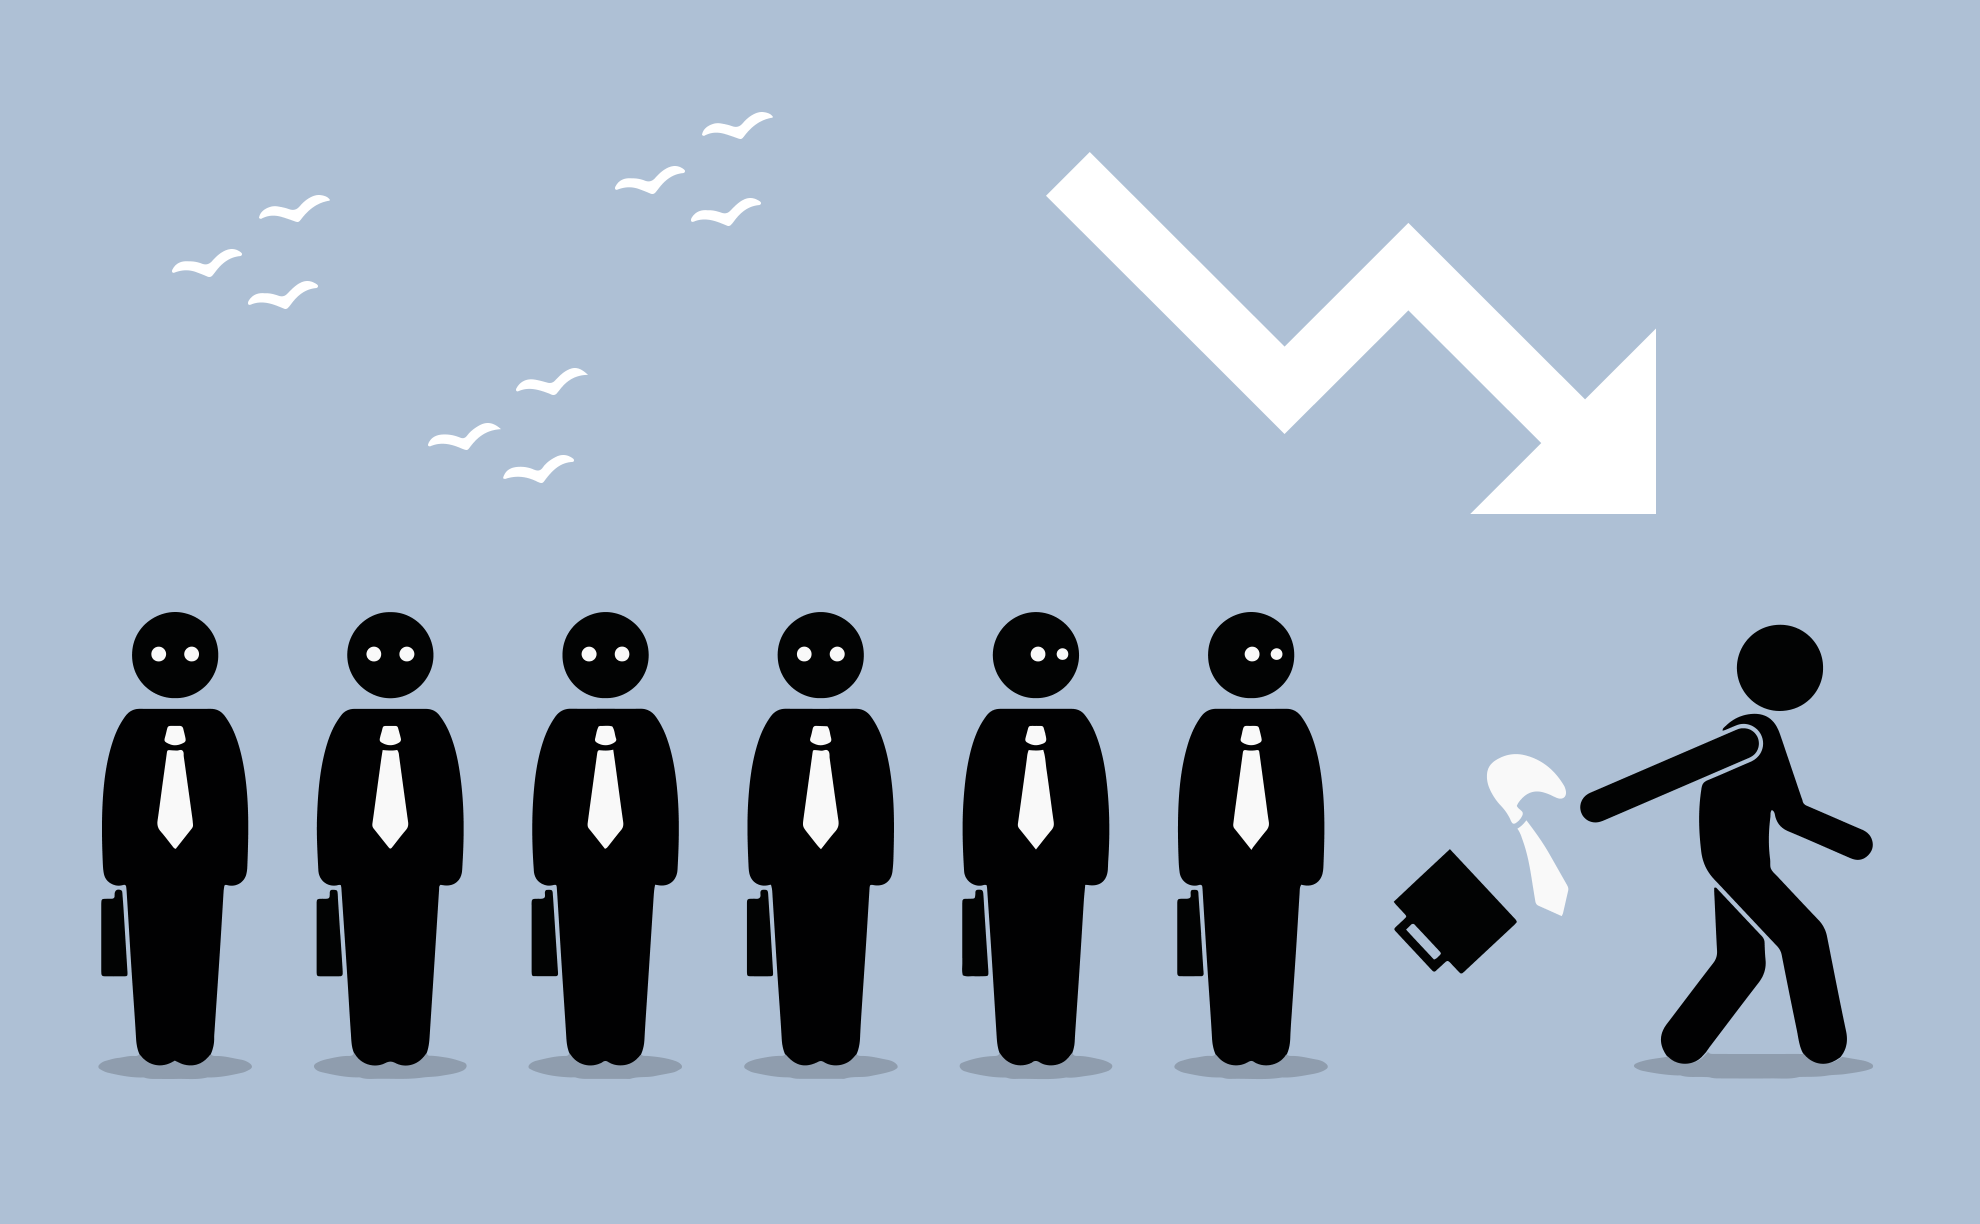

**GOAL OF THE STUDY**

We need to find the probability of attirition based on various factors, The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',10)

**IMPORTING AND MERGING DATA**

In [ ]:
in_time=pd.read_csv('/content/in_time.csv')
out_time=pd.read_csv('/content/out_time.csv')
employee_survey_data=pd.read_csv('/content/employee_survey_data.csv')
manager_survey_data=pd.read_csv('/content/manager_survey_data.csv')
general_data=pd.read_csv('/content/general_data.csv')

In [ ]:
in_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  2015-01-14  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06         NaN   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29         NaN   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26         NaN   
3  2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22         NaN   
4  2015-01-09 10:00:50  2015-01-12 10:29:27  2015-01-13 09:59:32         NaN   

            2015-01-15           2015-01-16           2015-01-19  \
0  2015-01-15 10:01:24  2015-01-16 10:19:08                  NaN   
1  2015-01-15 09:37:57  2015-01-16 09:57:18  2015-01-19 10:23:43   
2  2015-01-15 09:55:11  2015-01-16 10:05:36  2015-01-19 09:47:53   
3  2015-01-15 10:00:50  2015-01-16 09:58:06  2015-01-19 09:43:11   
4  2015-01-15 10:06:12  2015-01-16 10:03:50                  NaN   

            2015-01-20           2015-01-21           2015-01-22  \
0  2015-01-20 09:50:34  2015-01-21 09:49:42  2015-01-22 09:47:45   
1  2015-01-20 09:29:03  2015-01-21 09:46:45  2015-01-22 10:03:51   
2  2015-01-20 09:57:09  2015-01-21 10:29:40  2015-01-22 09:59:11   
3  2015-01-20 10:29:06  2015-01-21 10:04:33  2015-01-22 09:51:07   
4  2015-01-20 10:10:29  2015-01-21 10:28:15  2015-01-22 10:10:10   

            2015-01-23  2015-01-26           2015-01-27           2015-01-28  \
0  2015-01-23 09:23:44         NaN  2015-01-27 09:50:37  2015-01-28 09:56:13   
1  2015-01-23 09:20:06         NaN  2015-01-27 10:07:48  2015-01-28 10:08:25   
2  2015-01-23 10:16:34         NaN  2015-01-27 10:07:30  2015-01-28 10:05:43   
3  2015-01-23 09:56:56         NaN  2015-01-27 09:48:31  2015-01-28 10:00:39   
4  2015-01-23 09:34:34         NaN  2015-01-27 09:56:59  2015-01-28 09:45:03   

            2015-01-29           2015-01-30           2015-02-02  \
0  2015-01-29 09:53:47  2015-01-30 10:09:26  2015-02-02 09:38:43   
1  2015-01-29 09:52:04  2015-01-30 09:49:49  2015-02-02 10:07:26   
2  2015-01-29 10:06:48  2015-01-30 10:14:36  2015-02-02 09:54:45   
3  2015-01-29 09:49:28  2015-01-30 09:56:31  2015-02-02 10:14:08   
4  2015-01-29 10:11:41  2015-01-30 10:24:50  2015-02-02 09:43:27   

            2015-02-03           2015-02-04           2015-02-05  \
0  2015-02-03 10:23:38  2015-02-04 09:48:37  2015-02-05 09:52:36   
1  2015-02-03 09:55:45  2015-02-04 10:25:41  2015-02-05 10:05:11   
2  2015-02-03 09:27:11  2015-02-04 10:04:03  2015-02-05 10:08:11   
3  2015-02-03 10:01:31  2015-02-04 10:31:44  2015-02-05 10:02:39   
4  2015-02-03 09:55:59  2015-02-04 10:03:25  2015-02-05 10:02:17   

            2015-02-06           2015-02-09           2015-02-10  \
0  2015-02-06 09:53:23  2015-02-09 10:01:45  2015-02-10 10:14:18   
1  2015-02-06 09:12:39                  NaN  2015-02-10 10:10:13   
2  2015-02-06 10:23:51  2015-02-09 10:08:43  2015-02-10 10:26:18   
3  2015-02-06 09:24:21  2015-02-09 09:56:27                  NaN   
4  2015-02-06 09:55:43  2015-02-09 10:15:16  2015-02-10 09:43:48   

            2015-02-11           2015-02-12           2015-02-13  \
0  2015-02-11 10:18:44  2015-02-12 10:10:35  2015-02-13 09:13:07   
1  2015-02-11 09:40:20  

In [ ]:
in_time.isna().sum()

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

In [ ]:
in_time=in_time.replace(np.nan,0)

In [ ]:
in_time=in_time.drop(['Unnamed: 0'],axis=1)

In [ ]:
in_time.shape

(4410, 261)

In [ ]:
in_time.head()

2015-01-01           2015-01-02           2015-01-05           2015-01-06  \
0         0.0  2015-01-02 09:43:45  2015-01-05 10:08:48  2015-01-06 09:54:26   
1         0.0  2015-01-02 10:15:44  2015-01-05 10:21:05                    0   
2         0.0  2015-01-02 10:17:41  2015-01-05 09:50:50  2015-01-06 10:14:13   
3         0.0  2015-01-02 10:05:06  2015-01-05 09:56:32  2015-01-06 10:11:07   
4         0.0  2015-01-02 10:28:17  2015-01-05 09:49:58  2015-01-06 09:45:28   

            2015-01-07           2015-01-08           2015-01-09  \
0  2015-01-07 09:34:31  2015-01-08 09:51:09  2015-01-09 10:09:25   
1  2015-01-07 09:45:17  2015-01-08 10:09:04  2015-01-09 09:43:26   
2  2015-01-07 09:47:27  2015-01-08 10:03:40  2015-01-09 10:05:49   
3  2015-01-07 09:37:30  2015-01-08 10:02:08  2015-01-09 10:08:12   
4  2015-01-07 09:49:37  2015-01-08 10:19:44  2015-01-09 10:00:50   

            2015-01-12           2015-01-13  2015-01-14           2015-01-15  \
0  2015-01-12 09:42:53  2015-01-13 10:13:06         0.0  2015-01-15 10:01:24   
1  2015-01-12 10:00:07  2015-01-13 10:43:29         0.0  2015-01-15 09:37:57   
2  2015-01-12 10:03:47  2015-01-13 10:21:26         0.0  2015-01-15 09:55:11   
3  2015-01-12 10:13:42  2015-01-13 09:53:22         0.0  2015-01-15 10:00:50   
4  2015-01-12 10:29:27  2015-01-13 09:59:32         0.0  2015-01-15 10:06:12   

            2015-01-16           2015-01-19           2015-01-20  \
0  2015-01-16 10:19:08                    0  2015-01-20 09:50:34   
1  2015-01-16 09:57:18  2015-01-19 10:23:43  2015-01-20 09:29:03   
2  2015-01-16 10:05:36  2015-01-19 09:47:53  2015-01-20 09:57:09   
3  2015-01-16 09:58:06  2015-01-19 09:43:11  2015-01-20 10:29:06   
4  2015-01-16 10:03:50                    0  2015-01-20 10:10:29   

            2015-01-21           2015-01-22           2015-01-23  2015-01-26  \
0  2015-01-21 09:49:42  2015-01-22 09:47:45  2015-01-23 09:23:44         0.0   
1  2015-01-21 09:46:45  2015-01-22 10:03:51  2015-01-23 09:20:06         0.0   
2  2015-01-21 10:29:40  2015-01-22 09:59:11  2015-01-23 10:16:34         0.0   
3  2015-01-21 10:04:33  2015-01-22 09:51:07  2015-01-23 09:56:56         0.0   
4  2015-01-21 10:28:15  2015-01-22 10:10:10  2015-01-23 09:34:34         0.0   

            2015-01-27           2015-01-28           2015-01-29  \
0  2015-01-27 09:50:37  2015-01-28 09:56:13  2015-01-29 09:53:47   
1  2015-01-27 10:07:48  2015-01-28 10:08:25  2015-01-29 09:52:04   
2  2015-01-27 10:07:30  2015-01-28 10:05:43  2015-01-29 10:06:48   
3  2015-01-27 09:48:31  2015-01-28 10:00:39  2015-01-29 09:49:28   
4  2015-01-27 09:56:59  2015-01-28 09:45:03  2015-01-29 10:11:41   

            2015-01-30           2015-02-02           2015-02-03  \
0  2015-01-30 10:09:26  2015-02-02 09:38:43  2015-02-03 10:23:38   
1  2015-01-30 09:49:49  2015-02-02 10:07:26  2015-02-03 09:55:45   
2  2015-01-30 10:14:36  2015-02-02 09:54:45  2015-02-03 09:27:11   
3  2015-01-30 09:56:31  2015-02-02 10:14:08  2015-02-03 10:01:31   
4  2015-01-30 10:24:50  2015-02-02 09:43:27  2015-02-03 09:55:59   

            2015-02-04           2015-02-05           2015-02-06  \
0  2015-02-04 09:48:37  2015-02-05 09:52:36  2015-02-06 09:53:23   
1  2015-02-04 10:25:41  2015-02-05 10:05:11  2015-02-06 09:12:39   
2  2015-02-04 10:04:03  2015-02-05 10:08:11  2015-02-06 10:23:51   
3  2015-02-04 10:31:44  2015-02-05 10:02:39  2015-02-06 09:24:21   
4  2015-02-04 10:03:25  2015-02-05 10:02:17  2015-02-06 09:55:43   

            2015-02-09           2015-02-10           2015-02-11  \
0  2015-02-09 10:01:45  2015-02-10 10:14:18  2015-02-11 10:18:44   
1                    0  2015-02-10 10:10:13  2015-02-11 09:40:20   
2  2015-02-09 10:08:43  2015-02-10 10:26:18  2015-02-11 10:02:13   
3  2015-02-09 09:56:27                    0  2015-02-11 10:00:32   
4  2015-02-09 10:15:16  2015-02-10 09:43:48  2015-02-11 10:03:36   

            2015-02-12           2015-02-13           2015-02-16  \
0  2015-02-12 10:10:35  2015-02-13 09:

In [ ]:
in_time=in_time.apply(pd.to_datetime,errors='coerce')
in_time.head()

2015-01-01          2015-01-02          2015-01-05          2015-01-06  \
0 1970-01-01 2015-01-02 09:43:45 2015-01-05 10:08:48 2015-01-06 09:54:26   
1 1970-01-01 2015-01-02 10:15:44 2015-01-05 10:21:05 1970-01-01 00:00:00   
2 1970-01-01 2015-01-02 10:17:41 2015-01-05 09:50:50 2015-01-06 10:14:13   
3 1970-01-01 2015-01-02 10:05:06 2015-01-05 09:56:32 2015-01-06 10:11:07   
4 1970-01-01 2015-01-02 10:28:17 2015-01-05 09:49:58 2015-01-06 09:45:28   

           2015-01-07          2015-01-08          2015-01-09  \
0 2015-01-07 09:34:31 2015-01-08 09:51:09 2015-01-09 10:09:25   
1 2015-01-07 09:45:17 2015-01-08 10:09:04 2015-01-09 09:43:26   
2 2015-01-07 09:47:27 2015-01-08 10:03:40 2015-01-09 10:05:49   
3 2015-01-07 09:37:30 2015-01-08 10:02:08 2015-01-09 10:08:12   
4 2015-01-07 09:49:37 2015-01-08 10:19:44 2015-01-09 10:00:50   

           2015-01-12          2015-01-13 2015-01-14          2015-01-15  \
0 2015-01-12 09:42:53 2015-01-13 10:13:06 1970-01-01 2015-01-15 10:01:24   
1 2015-01-12 10:00:07 2015-01-13 10:43:29 1970-01-01 2015-01-15 09:37:57   
2 2015-01-12 10:03:47 2015-01-13 10:21:26 1970-01-01 2015-01-15 09:55:11   
3 2015-01-12 10:13:42 2015-01-13 09:53:22 1970-01-01 2015-01-15 10:00:50   
4 2015-01-12 10:29:27 2015-01-13 09:59:32 1970-01-01 2015-01-15 10:06:12   

           2015-01-16          2015-01-19          2015-01-20  \
0 2015-01-16 10:19:08 1970-01-01 00:00:00 2015-01-20 09:50:34   
1 2015-01-16 09:57:18 2015-01-19 10:23:43 2015-01-20 09:29:03   
2 2015-01-16 10:05:36 2015-01-19 09:47:53 2015-01-20 09:57:09   
3 2015-01-16 09:58:06 2015-01-19 09:43:11 2015-01-20 10:29:06   
4 2015-01-16 10:03:50 1970-01-01 00:00:00 2015-01-20 10:10:29   

           2015-01-21          2015-01-22          2015-01-23 2015-01-26  \
0 2015-01-21 09:49:42 2015-01-22 09:47:45 2015-01-23 09:23:44 1970-01-01   
1 2015-01-21 09:46:45 2015-01-22 10:03:51 2015-01-23 09:20:06 1970-01-01   
2 2015-01-21 10:29:40 2015-01-22 09:59:11 2015-01-23 10:16:34 1970-01-01   
3 2015-01-21 10:04:33 2015-01-22 09:51:07 2015-01-23 09:56:56 1970-01-01   
4 2015-01-21 10:28:15 2015-01-22 10:10:10 2015-01-23 09:34:34 1970-01-01   

           2015-01-27          2015-01-28          2015-01-29  \
0 2015-01-27 09:50:37 2015-01-28 09:56:13 2015-01-29 09:53:47   
1 2015-01-27 10:07:48 2015-01-28 10:08:25 2015-01-29 09:52:04   
2 2015-01-27 10:07:30 2015-01-28 10:05:43 2015-01-29 10:06:48   
3 2015-01-27 09:48:31 2015-01-28 10:00:39 2015-01-29 09:49:28   
4 2015-01-27 09:56:59 2015-01-28 09:45:03 2015-01-29 10:11:41   

           2015-01-30          2015-02-02          2015-02-03  \
0 2015-01-30 10:09:26 2015-02-02 09:38:43 2015-02-03 10:23:38   
1 2015-01-30 09:49:49 2015-02-02 10:07:26 2015-02-03 09:55:45   
2 2015-01-30 10:14:36 2015-02-02 09:54:45 2015-02-03 09:27:11   
3 2015-01-30 09:56:31 2015-02-02 10:14:08 2015-02-03 10:01:31   
4 2015-01-30 10:24:50 2015-02-02 09:43:27 2015-02-03 09:55:59   

           2015-02-04          2015-02-05          2015-02-06  \
0 2015-02-04 09:48:37 2015-02-05 09:52:36 2015-02-06 09:53:23   
1 2015-02-04 10:25:41 2015-02-05 10:05:11 2015-02-06 09:12:39   
2 2015-02-04 10:04:03 2015-02-05 10:08:11 2015-02-06 10:23:51   
3 2015-02-04 10:31:44 2015-02-05 10:02:39 2015-02-06 09:24:21   
4 2015-02-04 10:03:25 2015-02-05 10:02:17 2015-02-06 09:55:43   

           2015-02-09          2015-02-10          2015-02-11  \
0 2015-02-09 10:01:45 2015-02-10 10:14:18 2015-02-11 10:18:44   
1 1970-01-01 00:00:00 2015-02-10 10:10:13 2015-02-11 09:40:20   
2 2015-02-09 10:08:43 2015-02-10 10:26:18 2015-02-11 10:02:13   
3 2015-02-09 09:56:27 1970-01-01 00:00:00 2015-02-11 10:00:32   
4 2015-02-09 10:15:16 2015-02-10 09:43:48 2015-02-11 10:03:36   

           2015-02-12          2015-02-13          2015-02-16  \
0 2015-02-12 10:10:35 2015-02-13 09:13:07 2015-02-16 10:14:02   
1 2015-02-12 10:10:09 2015-02-13 09:35:25 2015-02-16 10:04:12   
2 2015-02-12 09:55:10 2015-02-13 10:32:34 2015-02-16 10:18:43   
3 2015-02-12 10:01:48 201

In [ ]:
out_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   
4           5         NaN  2015-01-02 18:31:37  2015-01-05 17:49:15   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4  2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   

            2015-01-09           2015-01-12           2015-01-13  2015-01-14  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58         NaN   
1  2015-01-09 16:52:29  2015-01-12 17:36:48  2015-01-13 18:00:13         NaN   
2  2015-01-09 16:57:30  2015-01-12 17:28:54  2015-01-13 17:21:25         NaN   
3  2015-01-09 17:19:47  2015-01-12 17:13:37  2015-01-13 17:11:45         NaN   
4  2015-01-09 17:44:08  2015-01-12 18:51:21  2015-01-13 18:14:58         NaN   

            2015-01-15           2015-01-16           2015-01-19  \
0  2015-01-15 17:22:13  2015-01-16 17:35:11                  NaN   
1  2015-01-15 17:14:44  2015-01-16 17:40:57  2015-01-19 17:58:22   
2  2015-01-15 17:21:29  2015-01-16 17:18:13  2015-01-19 16:52:13   
3  2015-01-15 16:53:26  2015-01-16 16:52:34  2015-01-19 16:14:18   
4  2015-01-15 18:21:48  2015-01-16 18:28:03                  NaN   

            2015-01-20           2015-01-21           2015-01-22  \
0  2015-01-20 16:37:07  2015-01-21 16:55:24  2015-01-22 16:50:47   
1  2015-01-20 17:05:13  2015-01-21 17:41:05  2015-01-22 17:26:26   
2  2015-01-20 16:52:23  2015-01-21 17:17:50  2015-01-22 17:27:54   
3  2015-01-20 17:39:50  2015-01-21 16:46:51  2015-01-22 16:51:48   
4  2015-01-20 17:59:24  2015-01-21 18:41:38  2015-01-22 18:27:37   

            2015-01-23  2015-01-26           2015-01-27           2015-01-28  \
0  2015-01-23 17:00:01         NaN  2015-01-27 17:28:22  2015-01-28 17:03:21   
1  2015-01-23 17:06:50         NaN  2015-01-27 17:35:50  2015-01-28 17:19:48   
2  2015-01-23 17:11:52         NaN  2015-01-27 17:22:27  2015-01-28 16:24:04   
3  2015-01-23 17:05:41         NaN  2015-01-27 17:03:48  2015-01-28 17:33:22   
4  2015-01-23 16:53:11         NaN  2015-01-27 17:52:43  2015-01-28 17:40:46   

            2015-01-29           2015-01-30           2015-02-02  \
0  2015-01-29 17:18:36  2015-01-30 17:00:25  2015-02-02 16:32:49   
1  2015-01-29 17:07:38  2015-01-30 16:53:22  2015-02-02 17:45:18   
2  2015-01-29 17:20:07  2015-01-30 17:16:03  2015-02-02 16:59:01   
3  2015-01-29 16:44:01  2015-01-30 17:09:42  2015-02-02 17:18:12   
4  2015-01-29 18:16:26  2015-01-30 18:26:33  2015-02-02 17:53:21   

            2015-02-03           2015-02-04           2015-02-05  \
0  2015-02-03 17:35:49  2015-02-04 17:24:56  2015-02-05 17:26:31   
1  2015-02-03 17:33:42  2015-02-04 18:04:20  2015-02-05 17:43:25   
2  2015-02-03 15:58:24  2015-02-04 17:25:54  2015-02-05 16:29:41   
3  2015-02-03 17:27:41  2015-02-04 17:30:22  2015-02-05 17:11:44   
4  2015-02-03 17:57:43  2015-02-04 18:03:13  2015-02-05 18:07:43   

            2015-02-06           2015-02-09           2015-02-10  \
0  2015-02-06 17:21:35  2015-02-09 17:37:50  2015-02-10 17:30:20   
1  2015-02-06 17:06:42                  NaN  2015-02-10 18:12:17   
2  2015-02-06 17:18:15  2015-02-09 16:48:18  2015-02-10 17:15:49   
3  2015-02-06 16:33:04  2015-02-09 17:16:29                  NaN   
4  2015-02-06 17:38:14  2015-02-09 18:26:28  2015-02-10 17:24:32   

            2015-02-11           2015-02-12           2015-02-13  \
0  2015-02-11 17:30:19  2015-02-12 17:36:42  2015-02-13 16:25:26   
1  2015-02-11 17:18:36  

In [ ]:
out_time.isna().sum()

Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64

In [ ]:
out_time=out_time.drop(['Unnamed: 0'],axis=1)

In [ ]:
out_time=out_time.replace(np.nan,0)

In [ ]:
out_time=out_time.apply(pd.to_datetime,errors='coerce')

In [ ]:
out_time.head()

2015-01-01          2015-01-02          2015-01-05          2015-01-06  \
0 1970-01-01 2015-01-02 16:56:15 2015-01-05 17:20:11 2015-01-06 17:19:05   
1 1970-01-01 2015-01-02 18:22:17 2015-01-05 17:48:22 1970-01-01 00:00:00   
2 1970-01-01 2015-01-02 16:59:14 2015-01-05 17:06:46 2015-01-06 16:38:32   
3 1970-01-01 2015-01-02 17:25:24 2015-01-05 17:14:03 2015-01-06 17:07:42   
4 1970-01-01 2015-01-02 18:31:37 2015-01-05 17:49:15 2015-01-06 17:26:25   

           2015-01-07          2015-01-08          2015-01-09  \
0 2015-01-07 16:34:55 2015-01-08 17:08:32 2015-01-09 17:38:29   
1 2015-01-07 17:09:06 2015-01-08 17:34:04 2015-01-09 16:52:29   
2 2015-01-07 16:33:21 2015-01-08 17:24:22 2015-01-09 16:57:30   
3 2015-01-07 16:32:40 2015-01-08 16:53:11 2015-01-09 17:19:47   
4 2015-01-07 17:37:59 2015-01-08 17:59:28 2015-01-09 17:44:08   

           2015-01-12          2015-01-13 2015-01-14          2015-01-15  \
0 2015-01-12 16:58:39 2015-01-13 18:02:58 1970-01-01 2015-01-15 17:22:13   
1 2015-01-12 17:36:48 2015-01-13 18:00:13 1970-01-01 2015-01-15 17:14:44   
2 2015-01-12 17:28:54 2015-01-13 17:21:25 1970-01-01 2015-01-15 17:21:29   
3 2015-01-12 17:13:37 2015-01-13 17:11:45 1970-01-01 2015-01-15 16:53:26   
4 2015-01-12 18:51:21 2015-01-13 18:14:58 1970-01-01 2015-01-15 18:21:48   

           2015-01-16          2015-01-19          2015-01-20  \
0 2015-01-16 17:35:11 1970-01-01 00:00:00 2015-01-20 16:37:07   
1 2015-01-16 17:40:57 2015-01-19 17:58:22 2015-01-20 17:05:13   
2 2015-01-16 17:18:13 2015-01-19 16:52:13 2015-01-20 16:52:23   
3 2015-01-16 16:52:34 2015-01-19 16:14:18 2015-01-20 17:39:50   
4 2015-01-16 18:28:03 1970-01-01 00:00:00 2015-01-20 17:59:24   

           2015-01-21          2015-01-22          2015-01-23 2015-01-26  \
0 2015-01-21 16:55:24 2015-01-22 16:50:47 2015-01-23 17:00:01 1970-01-01   
1 2015-01-21 17:41:05 2015-01-22 17:26:26 2015-01-23 17:06:50 1970-01-01   
2 2015-01-21 17:17:50 2015-01-22 17:27:54 2015-01-23 17:11:52 1970-01-01   
3 2015-01-21 16:46:51 2015-01-22 16:51:48 2015-01-23 17:05:41 1970-01-01   
4 2015-01-21 18:41:38 2015-01-22 18:27:37 2015-01-23 16:53:11 1970-01-01   

           2015-01-27          2015-01-28          2015-01-29  \
0 2015-01-27 17:28:22 2015-01-28 17:03:21 2015-01-29 17:18:36   
1 2015-01-27 17:35:50 2015-01-28 17:19:48 2015-01-29 17:07:38   
2 2015-01-27 17:22:27 2015-01-28 16:24:04 2015-01-29 17:20:07   
3 2015-01-27 17:03:48 2015-01-28 17:33:22 2015-01-29 16:44:01   
4 2015-01-27 17:52:43 2015-01-28 17:40:46 2015-01-29 18:16:26   

           2015-01-30          2015-02-02          2015-02-03  \
0 2015-01-30 17:00:25 2015-02-02 16:32:49 2015-02-03 17:35:49   
1 2015-01-30 16:53:22 2015-02-02 17:45:18 2015-02-03 17:33:42   
2 2015-01-30 17:16:03 2015-02-02 16:59:01 2015-02-03 15:58:24   
3 2015-01-30 17:09:42 2015-02-02 17:18:12 2015-02-03 17:27:41   
4 2015-01-30 18:26:33 2015-02-02 17:53:21 2015-02-03 17:57:43   

           2015-02-04          2015-02-05          2015-02-06  \
0 2015-02-04 17:24:56 2015-02-05 17:26:31 2015-02-06 17:21:35   
1 2015-02-04 18:04:20 2015-02-05 17:43:25 2015-02-06 17:06:42   
2 2015-02-04 17:25:54 2015-02-05 16:29:41 2015-02-06 17:18:15   
3 2015-02-04 17:30:22 2015-02-05 17:11:44 2015-02-06 16:33:04   
4 2015-02-04 18:03:13 2015-02-05 18:07:43 2015-02-06 17:38:14   

           2015-02-09          2015-02-10          2015-02-11  \
0 2015-02-09 17:37:50 2015-02-10 17:30:20 2015-02-11 17:30:19   
1 1970-01-01 00:00:00 2015-02-10 18:12:17 2015-02-11 17:18:36   
2 2015-02-09 16:48:18 2015-02-10 17:15:49 2015-02-11 16:49:22   
3 2015-02-09 17:16:29 1970-01-01 00:00:00 2015-02-11 17:04:11   
4 2015-02-09 18:26:28 2015-02-10 17:24:32 2015-02-11 18:01:25   

           2015-02-12          2015-02-13          2015-02-16  \
0 2015-02-12 17:36:42 2015-02-13 16:25:26 2015-02-16 17:50:23   
1 2015-02-12 18:08:01 2015-02-13 17:19:25 2015-02-16 17:46:09   
2 2015-02-12 16:22:31 2015-02-13 17:41:15 2015-02-16 17:20:05   
3 2015-02-12 17:22:16 201

In [ ]:
time_data=pd.concat([in_time,out_time])
time_data.head()

2015-01-01          2015-01-02          2015-01-05          2015-01-06  \
0 1970-01-01 2015-01-02 09:43:45 2015-01-05 10:08:48 2015-01-06 09:54:26   
1 1970-01-01 2015-01-02 10:15:44 2015-01-05 10:21:05 1970-01-01 00:00:00   
2 1970-01-01 2015-01-02 10:17:41 2015-01-05 09:50:50 2015-01-06 10:14:13   
3 1970-01-01 2015-01-02 10:05:06 2015-01-05 09:56:32 2015-01-06 10:11:07   
4 1970-01-01 2015-01-02 10:28:17 2015-01-05 09:49:58 2015-01-06 09:45:28   

           2015-01-07          2015-01-08          2015-01-09  \
0 2015-01-07 09:34:31 2015-01-08 09:51:09 2015-01-09 10:09:25   
1 2015-01-07 09:45:17 2015-01-08 10:09:04 2015-01-09 09:43:26   
2 2015-01-07 09:47:27 2015-01-08 10:03:40 2015-01-09 10:05:49   
3 2015-01-07 09:37:30 2015-01-08 10:02:08 2015-01-09 10:08:12   
4 2015-01-07 09:49:37 2015-01-08 10:19:44 2015-01-09 10:00:50   

           2015-01-12          2015-01-13 2015-01-14          2015-01-15  \
0 2015-01-12 09:42:53 2015-01-13 10:13:06 1970-01-01 2015-01-15 10:01:24   
1 2015-01-12 10:00:07 2015-01-13 10:43:29 1970-01-01 2015-01-15 09:37:57   
2 2015-01-12 10:03:47 2015-01-13 10:21:26 1970-01-01 2015-01-15 09:55:11   
3 2015-01-12 10:13:42 2015-01-13 09:53:22 1970-01-01 2015-01-15 10:00:50   
4 2015-01-12 10:29:27 2015-01-13 09:59:32 1970-01-01 2015-01-15 10:06:12   

           2015-01-16          2015-01-19          2015-01-20  \
0 2015-01-16 10:19:08 1970-01-01 00:00:00 2015-01-20 09:50:34   
1 2015-01-16 09:57:18 2015-01-19 10:23:43 2015-01-20 09:29:03   
2 2015-01-16 10:05:36 2015-01-19 09:47:53 2015-01-20 09:57:09   
3 2015-01-16 09:58:06 2015-01-19 09:43:11 2015-01-20 10:29:06   
4 2015-01-16 10:03:50 1970-01-01 00:00:00 2015-01-20 10:10:29   

           2015-01-21          2015-01-22          2015-01-23 2015-01-26  \
0 2015-01-21 09:49:42 2015-01-22 09:47:45 2015-01-23 09:23:44 1970-01-01   
1 2015-01-21 09:46:45 2015-01-22 10:03:51 2015-01-23 09:20:06 1970-01-01   
2 2015-01-21 10:29:40 2015-01-22 09:59:11 2015-01-23 10:16:34 1970-01-01   
3 2015-01-21 10:04:33 2015-01-22 09:51:07 2015-01-23 09:56:56 1970-01-01   
4 2015-01-21 10:28:15 2015-01-22 10:10:10 2015-01-23 09:34:34 1970-01-01   

           2015-01-27          2015-01-28          2015-01-29  \
0 2015-01-27 09:50:37 2015-01-28 09:56:13 2015-01-29 09:53:47   
1 2015-01-27 10:07:48 2015-01-28 10:08:25 2015-01-29 09:52:04   
2 2015-01-27 10:07:30 2015-01-28 10:05:43 2015-01-29 10:06:48   
3 2015-01-27 09:48:31 2015-01-28 10:00:39 2015-01-29 09:49:28   
4 2015-01-27 09:56:59 2015-01-28 09:45:03 2015-01-29 10:11:41   

           2015-01-30          2015-02-02          2015-02-03  \
0 2015-01-30 10:09:26 2015-02-02 09:38:43 2015-02-03 10:23:38   
1 2015-01-30 09:49:49 2015-02-02 10:07:26 2015-02-03 09:55:45   
2 2015-01-30 10:14:36 2015-02-02 09:54:45 2015-02-03 09:27:11   
3 2015-01-30 09:56:31 2015-02-02 10:14:08 2015-02-03 10:01:31   
4 2015-01-30 10:24:50 2015-02-02 09:43:27 2015-02-03 09:55:59   

           2015-02-04          2015-02-05          2015-02-06  \
0 2015-02-04 09:48:37 2015-02-05 09:52:36 2015-02-06 09:53:23   
1 2015-02-04 10:25:41 2015-02-05 10:05:11 2015-02-06 09:12:39   
2 2015-02-04 10:04:03 2015-02-05 10:08:11 2015-02-06 10:23:51   
3 2015-02-04 10:31:44 2015-02-05 10:02:39 2015-02-06 09:24:21   
4 2015-02-04 10:03:25 2015-02-05 10:02:17 2015-02-06 09:55:43   

           2015-02-09          2015-02-10          2015-02-11  \
0 2015-02-09 10:01:45 2015-02-10 10:14:18 2015-02-11 10:18:44   
1 1970-01-01 00:00:00 2015-02-10 10:10:13 2015-02-11 09:40:20   
2 2015-02-09 10:08:43 2015-02-10 10:26:18 2015-02-11 10:02:13   
3 2015-02-09 09:56:27 1970-01-01 00:00:00 2015-02-11 10:00:32   
4 2015-02-09 10:15:16 2015-02-10 09:43:48 2015-02-11 10:03:36   

           2015-02-12          2015-02-13          2015-02-16  \
0 2015-02-12 10:10:35 2015-02-13 09:13:07 2015-02-16 10:14:02   
1 2015-02-12 10:10:09 2015-02-13 09:35:25 2015-02-16 10:04:12   
2 2015-02-12 09:55:10 2015-02-13 10:32:34 2015-02-16 10:18:43   
3 2015-02-12 10:01:48 201

In [ ]:
time_data.shape

(8820, 261)

In [ ]:
time_data=time_data.diff(periods=4410)
time_data=time_data.iloc[4410:]
time_data.head()

2015-01-01      2015-01-02      2015-01-05      2015-01-06      2015-01-07  \
0     0 days 0 days 07:12:30 0 days 07:11:23 0 days 07:24:39 0 days 07:00:24   
1     0 days 0 days 08:06:33 0 days 07:27:17 0 days 00:00:00 0 days 07:23:49   
2     0 days 0 days 06:41:33 0 days 07:15:56 0 days 06:24:19 0 days 06:45:54   
3     0 days 0 days 07:20:18 0 days 07:17:31 0 days 06:56:35 0 days 06:55:10   
4     0 days 0 days 08:03:20 0 days 07:59:17 0 days 07:40:57 0 days 07:48:22   

       2015-01-08      2015-01-09      2015-01-12      2015-01-13 2015-01-14  \
0 0 days 07:17:23 0 days 07:29:04 0 days 07:15:46 0 days 07:49:52     0 days   
1 0 days 07:25:00 0 days 07:09:03 0 days 07:36:41 0 days 07:16:44     0 days   
2 0 days 07:20:42 0 days 06:51:41 0 days 07:25:07 0 days 06:59:59     0 days   
3 0 days 06:51:03 0 days 07:11:35 0 days 06:59:55 0 days 07:18:23     0 days   
4 0 days 07:39:44 0 days 07:43:18 0 days 08:21:54 0 days 08:15:26     0 days   

       2015-01-15      2015-01-16      2015-01-19      2015-01-20  \
0 0 days 07:20:49 0 days 07:16:03 0 days 00:00:00 0 days 06:46:33   
1 0 days 07:36:47 0 days 07:43:39 0 days 07:34:39 0 days 07:36:10   
2 0 days 07:26:18 0 days 07:12:37 0 days 07:04:20 0 days 06:55:14   
3 0 days 06:52:36 0 days 06:54:28 0 days 06:31:07 0 days 07:10:44   
4 0 days 08:15:36 0 days 08:24:13 0 days 00:00:00 0 days 07:48:55   

       2015-01-21      2015-01-22      2015-01-23 2015-01-26      2015-01-27  \
0 0 days 07:05:42 0 days 07:03:02 0 days 07:36:17     0 days 0 days 07:37:45   
1 0 days 07:54:20 0 days 07:22:35 0 days 07:46:44     0 days 0 days 07:28:02   
2 0 days 06:48:10 0 days 07:28:43 0 days 06:55:18     0 days 0 days 07:14:57   
3 0 days 06:42:18 0 days 07:00:41 0 days 07:08:45     0 days 0 days 07:15:17   
4 0 days 08:13:23 0 days 08:17:27 0 days 07:18:37     0 days 0 days 07:55:44   

       2015-01-28      2015-01-29      2015-01-30      2015-02-02  \
0 0 days 07:07:08 0 days 07:24:49 0 days 06:50:59 0 days 06:54:06   
1 0 days 07:11:23 0 days 07:15:34 0 days 07:03:33 0 days 07:37:52   
2 0 days 06:18:21 0 days 07:13:19 0 days 07:01:27 0 days 07:04:16   
3 0 days 07:32:43 0 days 06:54:33 0 days 07:13:11 0 days 07:04:04   
4 0 days 07:55:43 0 days 08:04:45 0 days 08:01:43 0 days 08:09:54   

       2015-02-03      2015-02-04      2015-02-05      2015-02-06  \
0 0 days 07:12:11 0 days 07:36:19 0 days 07:33:55 0 days 07:28:12   
1 0 days 07:37:57 0 days 07:38:39 0 days 07:38:14 0 days 07:54:03   
2 0 days 06:31:13 0 days 07:21:51 0 days 06:21:30 0 days 06:54:24   
3 0 days 07:26:10 0 days 06:58:38 0 days 07:09:05 0 days 07:08:43   
4 0 days 08:01:44 0 days 07:59:48 0 days 08:05:26 0 days 07:42:31   

       2015-02-09      2015-02-10      2015-02-11      2015-02-12  \
0 0 days 07:36:05 0 days 07:16:02 0 days 07:11:35 0 days 07:26:07   
1 0 days 00:00:00 0 days 08:02:04 0 days 07:38:16 0 days 07:57:52   
2 0 days 06:39:35 0 days 06:49:31 0 days 06:47:09 0 days 06:27:21   
3 0 days 07:20:02 0 days 00:00:00 0 days 07:03:39 0 days 07:20:28   
4 0 days 08:11:12 0 days 07:40:44 0 days 07:57:49 0 days 07:40:15   

       2015-02-13      2015-02-16      2015-02-17      2015-02-18  \
0 0 days 07:12:19 0 days 07:36:21 0 days 07:24:58 0 days 07:50:23   
1 0 days 07:44:00 0 days 07:41:57 0 days 07:24:25 0 days 07:54:14   
2 0 days 07:08:41 0 days 07:01:22 0 days 06:41:07 0 days 07:02:49   
3 0 days 07:08:44 0 days 07:21:01 0 days 07:06:38 0 days 06:52:21   
4 0 days 08:43:14 0 days 07:55:20 0 days 07:54:09 0 days 08:05:39   

       2015-02-19      2015-02-20      2015-02-23      2015-02-24  \
0 0 days 00:00:00 0 days 07:49:56 0 days 07:26:28 0 days 07:13:30   
1 0 days 07:54:46 0 days 07:25:27 0 days 08:15:20 0 days 07:48:00   
2 0 days 06:57:37 0 days 06:53:11 0 days 07:45:17 0 days 06:45:06   
3 0 days 07:31:25 0 days 06:41:52 0 days 07:10:47 0 days 07:03:51   
4 0 days 07:50:46 0 days 08:13:51 0 days 07:48:10 0 days 08:07:08   

       2015-02-25      2015-02-26      2015-02-27      2015-03-02  \


In [ ]:
time_data.shape

(4410, 261)

In [ ]:
time_data=time_data.drop(['2015-01-01','2015-01-14','2015-01-26','2015-03-05','2015-05-01','2015-07-17','2015-09-17','2015-10-02','2015-11-09','2015-11-10','2015-11-11','2015-12-25'],axis=1)

In [ ]:
actual_time=time_data.mean(axis=1)
time_data['actual_time']=actual_time

In [ ]:
time_data['hrs_worked']=time_data['actual_time']/np.timedelta64(1,'h')

In [ ]:
time_data.reset_index(inplace=True)
time_data.head()

index      2015-01-02      2015-01-05      2015-01-06      2015-01-07  \
0      0 0 days 07:12:30 0 days 07:11:23 0 days 07:24:39 0 days 07:00:24   
1      1 0 days 08:06:33 0 days 07:27:17 0 days 00:00:00 0 days 07:23:49   
2      2 0 days 06:41:33 0 days 07:15:56 0 days 06:24:19 0 days 06:45:54   
3      3 0 days 07:20:18 0 days 07:17:31 0 days 06:56:35 0 days 06:55:10   
4      4 0 days 08:03:20 0 days 07:59:17 0 days 07:40:57 0 days 07:48:22   

       2015-01-08      2015-01-09      2015-01-12      2015-01-13  \
0 0 days 07:17:23 0 days 07:29:04 0 days 07:15:46 0 days 07:49:52   
1 0 days 07:25:00 0 days 07:09:03 0 days 07:36:41 0 days 07:16:44   
2 0 days 07:20:42 0 days 06:51:41 0 days 07:25:07 0 days 06:59:59   
3 0 days 06:51:03 0 days 07:11:35 0 days 06:59:55 0 days 07:18:23   
4 0 days 07:39:44 0 days 07:43:18 0 days 08:21:54 0 days 08:15:26   

       2015-01-15      2015-01-16      2015-01-19      2015-01-20  \
0 0 days 07:20:49 0 days 07:16:03 0 days 00:00:00 0 days 06:46:33   
1 0 days 07:36:47 0 days 07:43:39 0 days 07:34:39 0 days 07:36:10   
2 0 days 07:26:18 0 days 07:12:37 0 days 07:04:20 0 days 06:55:14   
3 0 days 06:52:36 0 days 06:54:28 0 days 06:31:07 0 days 07:10:44   
4 0 days 08:15:36 0 days 08:24:13 0 days 00:00:00 0 days 07:48:55   

       2015-01-21      2015-01-22      2015-01-23      2015-01-27  \
0 0 days 07:05:42 0 days 07:03:02 0 days 07:36:17 0 days 07:37:45   
1 0 days 07:54:20 0 days 07:22:35 0 days 07:46:44 0 days 07:28:02   
2 0 days 06:48:10 0 days 07:28:43 0 days 06:55:18 0 days 07:14:57   
3 0 days 06:42:18 0 days 07:00:41 0 days 07:08:45 0 days 07:15:17   
4 0 days 08:13:23 0 days 08:17:27 0 days 07:18:37 0 days 07:55:44   

       2015-01-28      2015-01-29      2015-01-30      2015-02-02  \
0 0 days 07:07:08 0 days 07:24:49 0 days 06:50:59 0 days 06:54:06   
1 0 days 07:11:23 0 days 07:15:34 0 days 07:03:33 0 days 07:37:52   
2 0 days 06:18:21 0 days 07:13:19 0 days 07:01:27 0 days 07:04:16   
3 0 days 07:32:43 0 days 06:54:33 0 days 07:13:11 0 days 07:04:04   
4 0 days 07:55:43 0 days 08:04:45 0 days 08:01:43 0 days 08:09:54   

       2015-02-03      2015-02-04      2015-02-05      2015-02-06  \
0 0 days 07:12:11 0 days 07:36:19 0 days 07:33:55 0 days 07:28:12   
1 0 days 07:37:57 0 days 07:38:39 0 days 07:38:14 0 days 07:54:03   
2 0 days 06:31:13 0 days 07:21:51 0 days 06:21:30 0 days 06:54:24   
3 0 days 07:26:10 0 days 06:58:38 0 days 07:09:05 0 days 07:08:43   
4 0 days 08:01:44 0 days 07:59:48 0 days 08:05:26 0 days 07:42:31   

       2015-02-09      2015-02-10      2015-02-11      2015-02-12  \
0 0 days 07:36:05 0 days 07:16:02 0 days 07:11:35 0 days 07:26:07   
1 0 days 00:00:00 0 days 08:02:04 0 days 07:38:16 0 days 07:57:52   
2 0 days 06:39:35 0 days 06:49:31 0 days 06:47:09 0 days 06:27:21   
3 0 days 07:20:02 0 days 00:00:00 0 days 07:03:39 0 days 07:20:28   
4 0 days 08:11:12 0 days 07:40:44 0 days 07:57:49 0 days 07:40:15   

       2015-02-13      2015-02-16      2015-02-17      2015-02-18  \
0 0 days 07:12:19 0 days 07:36:21 0 days 07:24:58 0 days 07:50:23   
1 0 days 07:44:00 0 days 07:41:57 0 days 07:24:25 0 days 07:54:14   
2 0 days 07:08:41 0 days 07:01:22 0 days 06:41:07 0 days 07:02:49   
3 0 days 07:08:44 0 days 07:21:01 0 days 07:06:38 0 days 06:52:21   
4 0 days 08:43:14 0 days 07:55:20 0 days 07:54:09 0 days 08:05:39   

       2015-02-19      2015-02-20      2015-02-23      2015-02-24  \
0 0 days 00:00:00 0 days 07:49:56 0 days 07:26:28 0 days 07:13:30   
1 0 days 07:54:46 0 days 07:25:27 0 days 08:15:20 0 days 07:48:00   
2 0 days 06:57:37 0 days 06:53:11 0 days 07:45:17 0 days 06:45:06   
3 0 days 07:31:25 0 days 06:41:52 0 days 07:10:47 0 days 07:03:51   
4 0 days 07:50:46 0 days 08:13:51 0 days 07:48:10 0 days 08:07:08   

       2015-02-25      2015-02-26      2015-02-27      2015-03-02  \
0 0 days 07:35:01 0 days 07:12:03 0 days 07:23:09 0 days 07:09:25   
1 0 days 07:45:08 0 days 07:50:48 0 days 08:07:13 0 days 07:40:54   
2 0 days 06:56:25 0

In [ ]:
time_data1=time_data[['index','hrs_worked']]

In [ ]:
time_data1.rename(columns={'index':'EmployeeID'},inplace=True)
time_data1.head()

<ipython-input-157-d4dfac882094>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_data1.rename(columns={'index':'EmployeeID'},inplace=True)


EmployeeID  hrs_worked
0           0    6.870229
1           1    7.315971
2           2    6.816081
3           3    6.789215
4           4    7.877561

In [ ]:
general_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences              1           1  Female         1   
1          1  Life Sciences              1           2  Female         1   
2          4          Other              1           3    Male         4   
3          5  Life Sciences              1           4    Male         3   
4          1        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                1.0                      6               1   
1                6.0                      3               5   
2                5.0                      2               5   
3               13.0                      5               8   
4                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4

In [ ]:
employee_survey_data.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0

In [ ]:
manager_survey_data.head()

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3

**IMPORTING ALL DATAFILES INTO ONE CONSOLIDATED DATAFRAME**

In [ ]:
df1=pd.merge(general_data,employee_survey_data,on='EmployeeID',how='inner')
df2=pd.merge(df1,manager_survey_data,on='EmployeeID',how='inner')
hr_data=pd.merge(df2,time_data1,on='EmployeeID',how='inner')
hr_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  JobLevel  \
0          2  Life Sciences              1           1  Female         1   
1          1  Life Sciences              1           2  Female         1   
2          4          Other              1           3    Male         4   
3          5  Life Sciences              1           4    Male         3   
4          1        Medical              1           5    Male         1   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  \
0      Y                 11              8                 0   
1      Y                 23              8                 1   
2      Y                 15              8                 3   
3      Y                 11              8                 3   
4      Y                 12              8                 2   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                1.0                      6               1   
1                6.0                      3               5   
2                5.0                      2               5   
3               13.0                      5               8   
4                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  EnvironmentSatisfaction  \
0                        0                     0                      3.0   
1                        1                     4                      3.0   
2                        0                     3                      2.0   
3                        7                     5                      4.0   
4                        0                     4                      4.0   

   JobSatisfaction  WorkLifeBalance  JobInvolvement  PerformanceRating  \
0              4.0              2.0               3                  3   
1              2.0              4.0               2                  4   
2              2.0              1.0               3                  3   
3              4.0              3.0               2                  3   
4              1.0              3.0               3                  3   

   hrs_worked  
0    7.315971  
1    6.816081  
2    6.789215  
3    7.877561  
4   10.275802

In [ ]:
hr_data.describe()

Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4409.000000       4409.000000  4409.000000         4409.0  4409.000000   
mean     36.923112          9.188251     2.912905            1.0  2205.000000   
std       9.134220          8.100992     1.024048            0.0  1272.912998   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.000000   
50%      36.000000          7.000000     3.000000            1.0  2205.000000   
75%      43.000000         14.000000     4.000000            1.0  3307.000000   
max      60.000000         29.000000     5.000000            1.0  4409.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4409.000000    4409.000000         4390.000000        4409.000000   
mean      2.063960   65031.660240            2.695444          15.210252   
std       1.106814   47073.969139            2.498840           3.659203   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49080.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         4409.0       4409.000000        4401.000000   
mean             8.0          0.794058          11.279936   
std              0.0          0.851896           7.782222   
min              8.0          0.000000           0.000000   
25%              8.0          0.000000           6.000000   
50%              8.0          1.000000          10.000000   
75%              8.0          1.000000          15.000000   
max              8.0          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            4409.000000     4409.000000              4409.000000   
mean                2.798594        7.004990                 2.187571   
std                 1.288222        6.122203                 3.222042   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000        9.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager  EnvironmentSatisfaction  JobSatisfaction  \
count           4409.000000              4384.000000      4389.000000   
mean               4.122023                 2.723996         2.728184   
std                3.566975                 1.092571         1.101371   
min                0.000000                 1.000000         1.000000   
25%                2.000000                 2.000000         2.000000   
50%                3.000000                 3.000000         3.000000   
75%                7.000000                 4.000000         4.000000   
max               17.000000                 4.000000         4.000000   

       WorkLifeBalance  JobInvolvement  PerformanceRating   hrs_worked  
count      4372.000000     4409.000000        4409.000000  4409.000000  
mean          2.761436        2.729644           3.153776     7.314463  
std           0.706245        0.711223           0.360775     1.330903  
min           1.000000        1.000000           3.000000     5.416880  
25%           2.000000        2.000000           3.000000     6.278995  
50%           3.000000        3.000000           3.000000     7.011237  
75%           3.000000        3.000000           3.000000     7.900932  
max           4.000000        4.000000           4.000000    10.937261

In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4409 non-null   int64  
 1   Attrition                4409 non-null   object 
 2   BusinessTravel           4409 non-null   object 
 3   Department               4409 non-null   object 
 4   DistanceFromHome         4409 non-null   int64  
 5   Education                4409 non-null   int64  
 6   EducationField           4409 non-null   object 
 7   EmployeeCount            4409 non-null   int64  
 8   EmployeeID               4409 non-null   int64  
 9   Gender                   4409 non-null   object 
 10  JobLevel                 4409 non-null   int64  
 11  JobRole                  4409 non-null   object 
 12  MaritalStatus            4409 non-null   object 
 13  MonthlyIncome            4409 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
print(hr_data.groupby('EmployeeCount') ['EmployeeCount'].count())

EmployeeCount
1    4409
Name: EmployeeCount, dtype: int64


In [ ]:
print(hr_data.groupby('Over18') ['Over18'].count())

Over18
Y    4409
Name: Over18, dtype: int64


In [ ]:
print(hr_data.groupby('StandardHours') ['StandardHours'].count())

StandardHours
8    4409
Name: StandardHours, dtype: int64


**DROP NON-REQUIRED COLUMNS**

In [ ]:
hr_data.drop(['EmployeeCount','EmployeeID','Over18','StandardHours'],axis=1,inplace=True)
hr_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  Gender  JobLevel                    JobRole  \
0          2  Life Sciences  Female         1  Healthcare Representative   
1          1  Life Sciences  Female         1         Research Scientist   
2          4          Other    Male         4            Sales Executive   
3          5  Life Sciences    Male         3            Human Resources   
4          1        Medical    Male         1            Sales Executive   

  MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0       Married         131160                 1.0                 11   
1        Single          41890                 0.0                 23   
2       Married         193280                 1.0                 15   
3       Married          83210                 3.0                 11   
4        Single          23420                 4.0                 12   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0                1.0                      6               1   
1                 1                6.0                      3               5   
2                 3                5.0                      2               5   
3                 3               13.0                      5               8   
4                 2                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  EnvironmentSatisfaction  \
0                        0                     0                      3.0   
1                        1                     4                      3.0   
2                        0                     3                      2.0   
3                        7                     5                      4.0   
4                        0                     4                      4.0   

   JobSatisfaction  WorkLifeBalance  JobInvolvement  PerformanceRating  \
0              4.0              2.0               3                  3   
1              2.0              4.0               2                  4   
2              2.0              1.0               3                  3   
3              4.0              3.0               2                  3   
4              1.0              3.0               3                  3   

   hrs_worked  
0    7.315971  
1    6.816081  
2    6.789215  
3    7.877561  
4   10.275802

In [ ]:
 print(hr_data.groupby('Education') ['Education'].count())

Education
1     510
2     846
3    1715
4    1194
5     144
Name: Education, dtype: int64


In [ ]:
print(hr_data.groupby('JobLevel') ['JobLevel'].count())

JobLevel
1    1629
2    1601
3     654
4     318
5     207
Name: JobLevel, dtype: int64


In [ ]:
print(hr_data.groupby('EnvironmentSatisfaction') ['EnvironmentSatisfaction'].count())

EnvironmentSatisfaction
1.0     844
2.0     856
3.0    1350
4.0    1334
Name: EnvironmentSatisfaction, dtype: int64


In [ ]:
print(hr_data.groupby('JobSatisfaction') ['JobSatisfaction'].count())

JobSatisfaction
1.0     860
2.0     840
3.0    1322
4.0    1367
Name: JobSatisfaction, dtype: int64


In [ ]:
print(hr_data.groupby('WorkLifeBalance') ['WorkLifeBalance'].count())

WorkLifeBalance
1.0     239
2.0    1019
3.0    2660
4.0     454
Name: WorkLifeBalance, dtype: int64


In [ ]:
print(hr_data.groupby('JobInvolvement') ['JobInvolvement'].count())

JobInvolvement
1     249
2    1125
3    2604
4     431
Name: JobInvolvement, dtype: int64


In [ ]:
print(hr_data.groupby('PerformanceRating') ['PerformanceRating'].count())

PerformanceRating
3    3731
4     678
Name: PerformanceRating, dtype: int64


**DECODING VALUES**

In [ ]:
hr_data['Education']=hr_data['Education'].replace({1:'Below college',2:'College',3:'Bachelor',4:'Master',5:'Doctor'})
hr_data['JobLevel']=hr_data['JobLevel'].replace({1:'Entry-level',2:'Mid-level',3:'Senior-level',4:'Managerial-level',5:'Executive-level'})
hr_data['EnvironmentSatisfaction']=hr_data['EnvironmentSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Veryhigh'})
hr_data['JobSatisfaction']=hr_data['JobSatisfaction'].replace({1:'Low',2:'Medium',3:'High',4:'Veryhigh'})
hr_data['WorkLifeBalance']=hr_data['WorkLifeBalance'].replace({1:'Low',2:'Medium',3:'High',4:'Veryhigh'})
hr_data['JobInvolvement']=hr_data['JobInvolvement'].replace({1:'Low',2:'Medium',3:'High',4:'Veryhigh'})
hr_data['PerformanceRating']=hr_data['PerformanceRating'].replace({1:'Low',2:'Medium',3:'High',4:'Veryhigh'})

**INSPECTING THE DATAFRAME**

In [ ]:
hr_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

       Education EducationField  Gender          JobLevel  \
0        College  Life Sciences  Female       Entry-level   
1  Below college  Life Sciences  Female       Entry-level   
2         Master          Other    Male  Managerial-level   
3         Doctor  Life Sciences    Male      Senior-level   
4  Below college        Medical    Male       Entry-level   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 11                 0                1.0   
1                 23                 1                6.0   
2                 15                 3                5.0   
3                 11                 3               13.0   
4                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager EnvironmentSatisfaction JobSatisfaction  \
0                     0                    High        Veryhigh   
1                     4                    High          Medium   
2                     3                  Medium          Medium   
3                     5                Veryhigh        Veryhigh   
4                     4                Veryhigh             Low   

  WorkLifeBalance JobInvolvement PerformanceRating  hrs_worked  
0          Medium           High              High    7.315971  
1        Veryhigh         Medium          Veryhigh    6.816081  
2             Low           High              High    6.789215  
3            High         Medium              High    7.877561  
4            High           High              High   10.275802

In [ ]:
hr_data.shape

(4409, 26)

In [ ]:
hr_data.describe()

Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
count  4409.000000       4409.000000    4409.000000         4390.000000   
mean     36.923112          9.188251   65031.660240            2.695444   
std       9.134220          8.100992   47073.969139            2.498840   
min      18.000000          1.000000   10090.000000            0.000000   
25%      30.000000          2.000000   29110.000000            1.000000   
50%      36.000000          7.000000   49080.000000            2.000000   
75%      43.000000         14.000000   83800.000000            4.000000   
max      60.000000         29.000000  199990.000000            9.000000   

       PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
count        4409.000000       4409.000000        4401.000000   
mean           15.210252          0.794058          11.279936   
std             3.659203          0.851896           7.782222   
min            11.000000          0.000000           0.000000   
25%            12.000000          0.000000           6.000000   
50%            14.000000          1.000000          10.000000   
75%            18.000000          1.000000          15.000000   
max            25.000000          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            4409.000000     4409.000000              4409.000000   
mean                2.798594        7.004990                 2.187571   
std                 1.288222        6.122203                 3.222042   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000        9.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager   hrs_worked  
count           4409.000000  4409.000000  
mean               4.122023     7.314463  
std                3.566975     1.330903  
min                0.000000     5.416880  
25%                2.000000     6.278995  
50%                3.000000     7.011237  
75%                7.000000     7.900932  
max               17.000000    10.937261

In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4409 non-null   int64  
 1   Attrition                4409 non-null   object 
 2   BusinessTravel           4409 non-null   object 
 3   Department               4409 non-null   object 
 4   DistanceFromHome         4409 non-null   int64  
 5   Education                4409 non-null   object 
 6   EducationField           4409 non-null   object 
 7   Gender                   4409 non-null   object 
 8   JobLevel                 4409 non-null   object 
 9   JobRole                  4409 non-null   object 
 10  MaritalStatus            4409 non-null   object 
 11  MonthlyIncome            4409 non-null   int64  
 12  NumCompaniesWorked       4390 non-null   float64
 13  PercentSalaryHike        4409 non-null   int64  
 14  StockOptionLevel        

**COMPUTE AND FILL MISSING VALUES**

In [ ]:
pd.set_option('display.max_rows',None)
hr_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           8
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            37
JobInvolvement              0
PerformanceRating           0
hrs_worked                  0
dtype: int64

In [ ]:
count=hr_data.groupby('NumCompaniesWorked')['NumCompaniesWorked'].count()
count

NumCompaniesWorked
0.0     585
1.0    1558
2.0     438
3.0     474
4.0     415
5.0     187
6.0     208
7.0     222
8.0     147
9.0     156
Name: NumCompaniesWorked, dtype: int64

<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

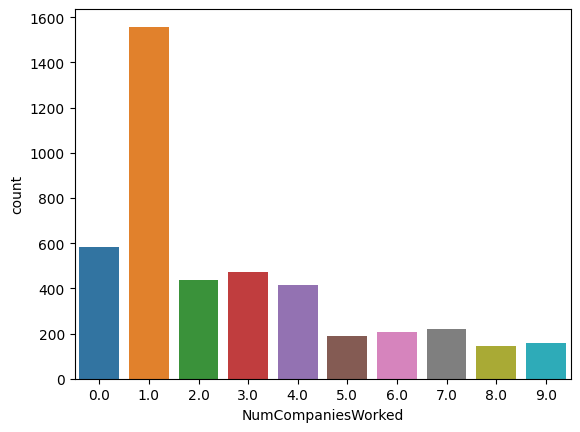

In [ ]:
sns.countplot(x='NumCompaniesWorked',data=hr_data)

<Axes: xlabel='NumCompaniesWorked'>

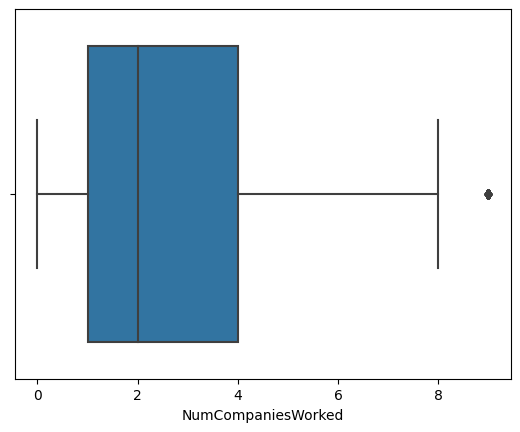

In [ ]:
sns.boxplot(x='NumCompaniesWorked',data=hr_data)

In [ ]:
x=hr_data['NumCompaniesWorked'].mean()
x

2.6954441913439635

In [ ]:
y=hr_data['NumCompaniesWorked'].median()
y

2.0

chose the whole number(median) to fill missing values

In [ ]:
hr_data['NumCompaniesWorked']=hr_data['NumCompaniesWorked'].fillna(y)

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

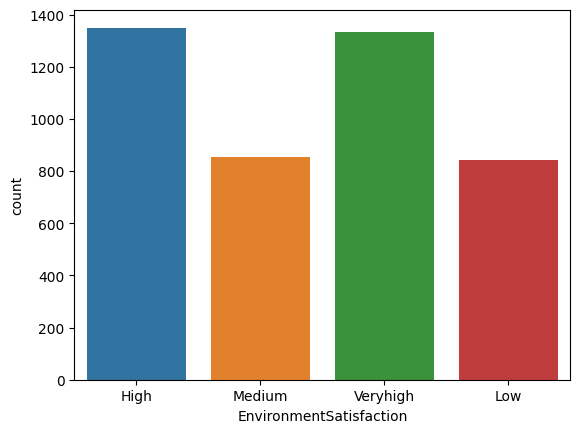

In [ ]:
sns.countplot(x='EnvironmentSatisfaction',data=hr_data)

In [ ]:
x=hr_data['EnvironmentSatisfaction'].mode() [0]
hr_data['EnvironmentSatisfaction']=hr_data['EnvironmentSatisfaction'].fillna(x)

<Axes: xlabel='JobSatisfaction', ylabel='count'>

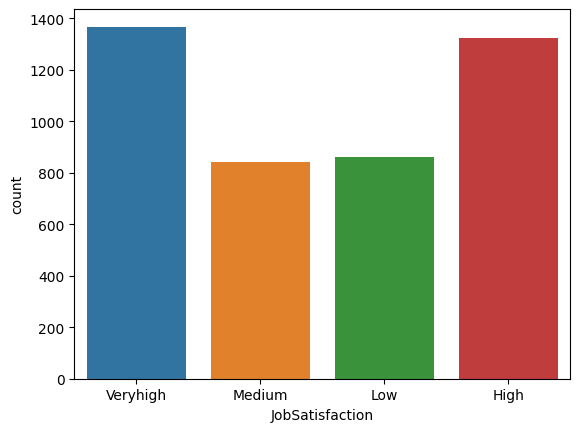

In [ ]:
sns.countplot(x='JobSatisfaction',data=hr_data)

In [ ]:
x=hr_data['JobSatisfaction'].mode() [0]
hr_data['JobSatisfaction']=hr_data['JobSatisfaction'].fillna(x)

<Axes: xlabel='JobSatisfaction', ylabel='count'>

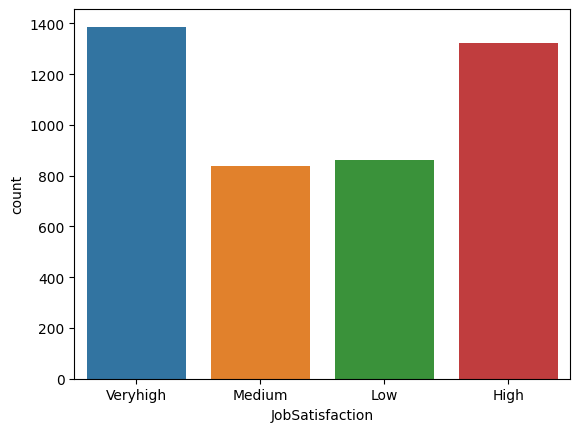

In [ ]:
sns.countplot(x='JobSatisfaction',data=hr_data)

In [ ]:
x=hr_data['JobSatisfaction'].mode() [0]
hr_data['JobSatisfaction']=hr_data['JobSatisfaction'].fillna(x)

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

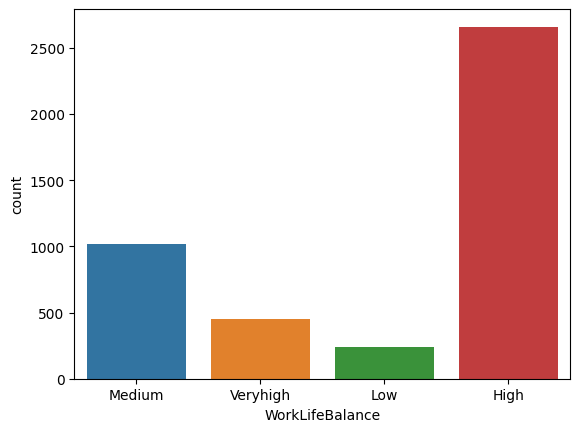

In [ ]:
sns.countplot(x='WorkLifeBalance',data=hr_data)

In [ ]:
x=hr_data['WorkLifeBalance'].mode() [0]
hr_data['WorkLifeBalance']=hr_data['WorkLifeBalance'].fillna(x)

In [ ]:
count=hr_data.groupby('TotalWorkingYears') ['TotalWorkingYears'].count()
count

TotalWorkingYears
0.0      33
1.0     242
2.0      93
3.0     126
4.0     189
5.0     264
6.0     375
7.0     243
8.0     307
9.0     287
10.0    605
11.0    106
12.0    144
13.0    108
14.0     93
15.0    120
16.0    111
17.0     99
18.0     81
19.0     66
20.0     89
21.0    102
22.0     62
23.0     66
24.0     54
25.0     42
26.0     42
27.0     21
28.0     42
29.0     30
30.0     21
31.0     27
32.0     27
33.0     21
34.0     15
35.0      9
36.0     18
37.0     12
38.0      3
40.0      6
Name: TotalWorkingYears, dtype: int64

<Axes: xlabel='TotalWorkingYears', ylabel='Count'>

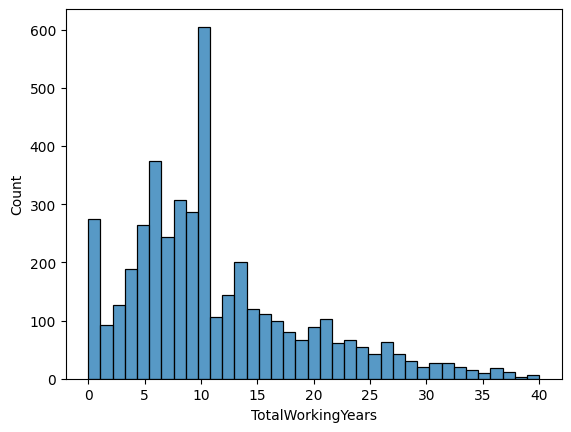

In [ ]:
sns.histplot(x='TotalWorkingYears',data=hr_data)

<Axes: xlabel='TotalWorkingYears'>

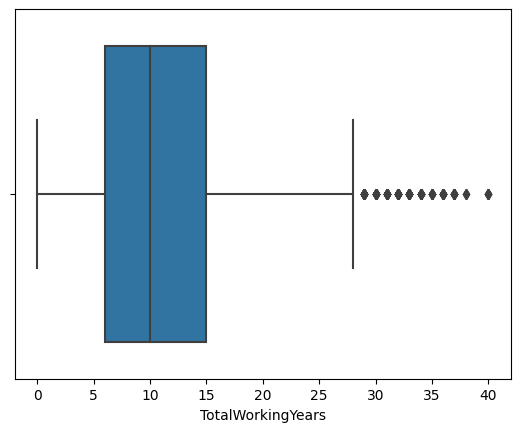

In [ ]:
sns.boxplot(x='TotalWorkingYears',data=hr_data)

In [ ]:
x=hr_data['TotalWorkingYears'].median()
x

10.0

filling the missing values with median 10

In [ ]:
hr_data['TotalWorkingYears']=hr_data['TotalWorkingYears'].fillna(x)

In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4409 non-null   int64  
 1   Attrition                4409 non-null   object 
 2   BusinessTravel           4409 non-null   object 
 3   Department               4409 non-null   object 
 4   DistanceFromHome         4409 non-null   int64  
 5   Education                4409 non-null   object 
 6   EducationField           4409 non-null   object 
 7   Gender                   4409 non-null   object 
 8   JobLevel                 4409 non-null   object 
 9   JobRole                  4409 non-null   object 
 10  MaritalStatus            4409 non-null   object 
 11  MonthlyIncome            4409 non-null   int64  
 12  NumCompaniesWorked       4409 non-null   float64
 13  PercentSalaryHike        4409 non-null   int64  
 14  StockOptionLevel        

In [ ]:
hr_data.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
hrs_worked                 0
dtype: int64

**EXPLORATOTY DATA ANALYSIS AND VISUALIZATION**

<Axes: xlabel='Attrition', ylabel='Age'>

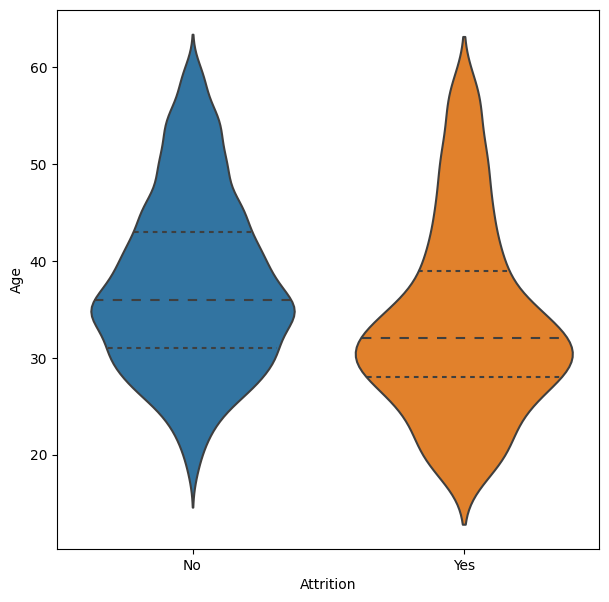

In [ ]:
plt.figure(figsize=(7,7))
sns.violinplot(x='Attrition',y='Age',data=hr_data,inner='quartiles')

<Axes: xlabel='Attrition', ylabel='Age'>

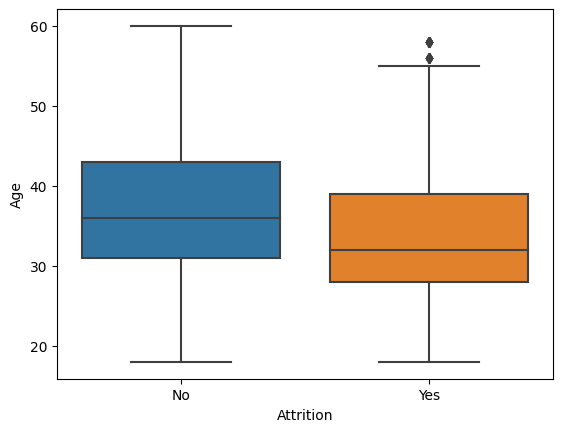

In [ ]:
sns.boxplot(x='Attrition',y='Age',data=hr_data)

**insights from violinplot**
* for attrition yes - median is 33 and interquartile range roughly between 28 to 39. means half of the employees who stayed in the company are these age group
* for attrition no - median is somewhat 37, which is slightly less than the median of those who stayed. and IQR is roughly between 31 to 42,means half of the employees whoe left the company are in this age group
* Based one the plot:-
   * The attrition rate is higher for employees in the age group of 28 to 39.
   * The most common age at which employees left the company is around 33.
* **So, employees in the age range of 28 to 39 are more likely to leave the company, and the peak age for attrition is around 33 years old. This could potentially indicate a trend where employees within this age range might be more susceptible to attrition**

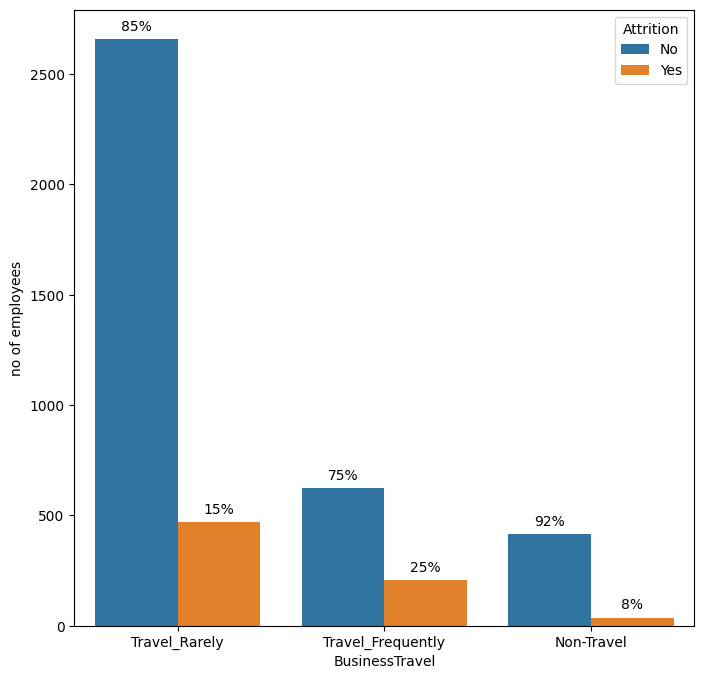

In [ ]:
plt.figure(figsize=(8,8))
plot=sns.countplot(x='BusinessTravel',hue='Attrition',data=hr_data)
plot.set_ylabel('no of employees')
bars=plot.patches
half=int(len(bars)/2)
left_bar=bars[:half]
right_bar=bars[half:]
for left,right in zip(left_bar,right_bar):
    height_l=left.get_height()
    height_r=right.get_height()
    total=height_l+height_r
    percentage_l=height_l/total
    percentage_r=height_r/total
    plot.text(left.get_x()+left.get_width()/2.,height_l+40,'{0:.0%}'.format(percentage_l),ha='center')
    plot.text(right.get_x()+right.get_width()/2.,height_r+40,'{0:.0%}'.format(percentage_r),ha='center')

**Insights from the plot**
* 85% of employees those who travel rarely stayed in the company and 15% of them left
* only 75% of the employees travel frequently stayed in the company and 25% left
* 92% of employees who doesn't have to travel for business purposes stayed in the company and only 8% left.

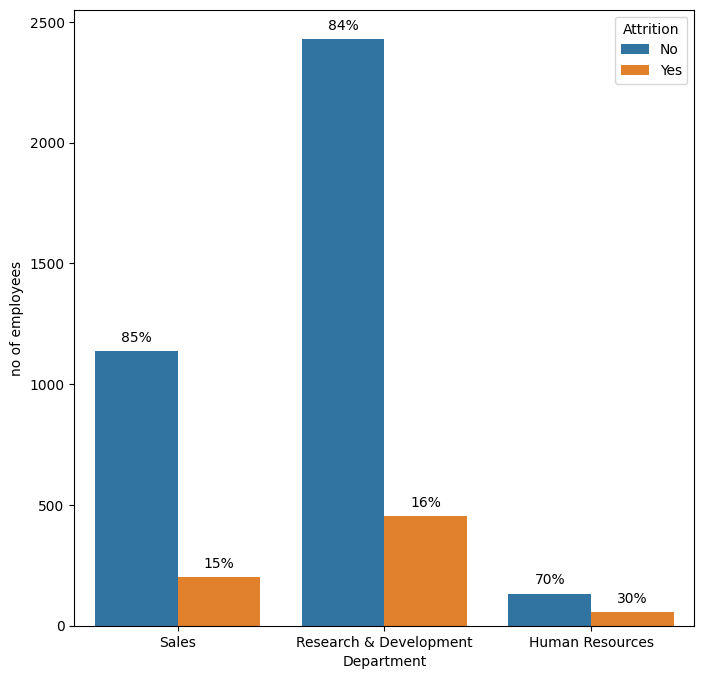

In [ ]:
plt.figure(figsize=(8,8))
plot=sns.countplot(x='Department',hue='Attrition',data=hr_data)
plot.set_ylabel('no of employees')
bars=plot.patches
half=int(len(bars)/2)
left_bar=bars[:half]
right_bar=bars[half:]
for a,b in zip(left_bar,right_bar):
  height_l=a.get_height()
  height_r=b.get_height()
  total=height_l+height_r
  percentage_l=height_l/total
  percentage_r=height_r/total
  plot.text(a.get_x()+a.get_width()/2.,height_l+40,'{0:.0%}'.format(percentage_l),ha='center')
  plot.text(b.get_x()+b.get_width()/2.,height_r+40,'{0:.0%}'.format(percentage_r),ha='center')

**Insights from the plot**
* 15% of employees from sales department,16% of employees from research&development department and 30% employees from human resources left the company in previous year.
* rate of attrition is higher in human resources compared to other departments

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

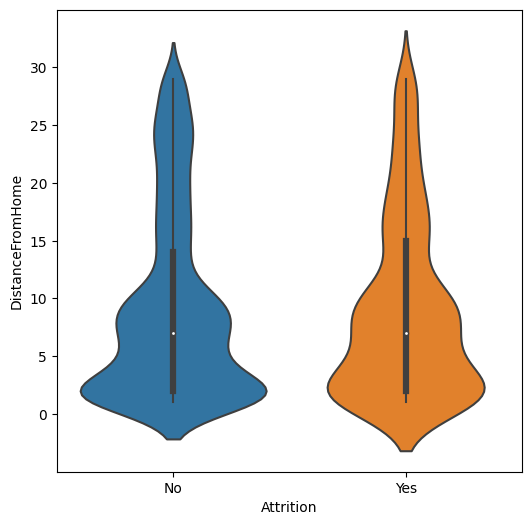

In [ ]:
plt.figure(figsize=(6,6))
sns.violinplot(y='DistanceFromHome',x='Attrition',data=hr_data)

**Insights from the plot**


The fact that the distribution of the 'DistanceFromHome' variable is similar for both attrition categories might indicate that the distance from home to the workplace doesn't play a significant role in employees' decisions to leave the company.

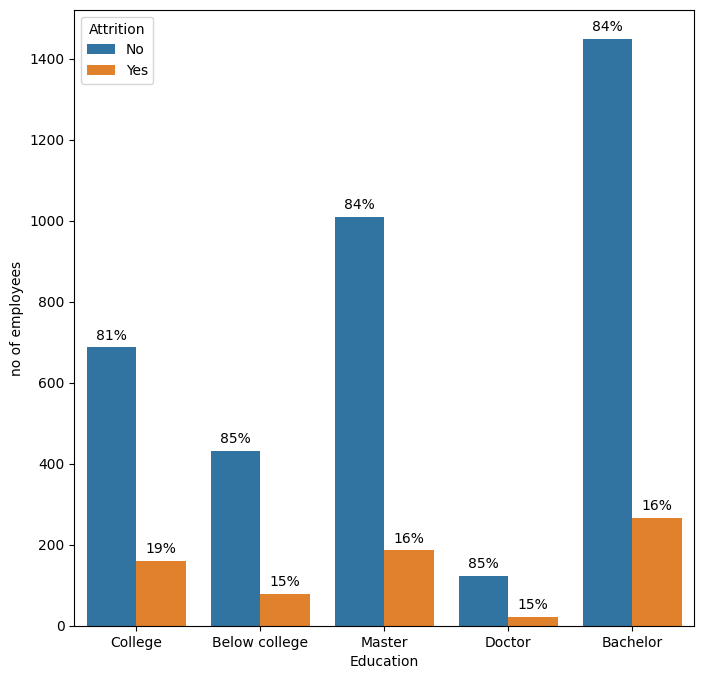

In [ ]:
plt.figure(figsize=(8,8))
plot=sns.countplot(x='Education',hue='Attrition',data=hr_data)
plot.set_ylabel('no of employees')
bars=plot.patches
half=int(len(bars)/2)
left_bar=bars[:half]
right_bar=bars[half:]
for left,right in zip(left_bar,right_bar):
  height_l=left.get_height()
  height_r=right.get_height()
  total=height_l+height_r
  percentage_l=height_l/total
  percentage_r=height_r/total
  plot.text(left.get_x()+left.get_width()/2.,height_l+20,'{0:.0%}'.format(percentage_l),ha='center')
  plot.text(right.get_x()+right.get_width()/2.,height_r+20,'{0:.0%}'.format(percentage_r),ha='center')

**Insights from plot**
* no of employees left and stayed in the company are almost similar for education categories. hence from the plot we can say education might not have that much impact on the attrition of employees in previous year

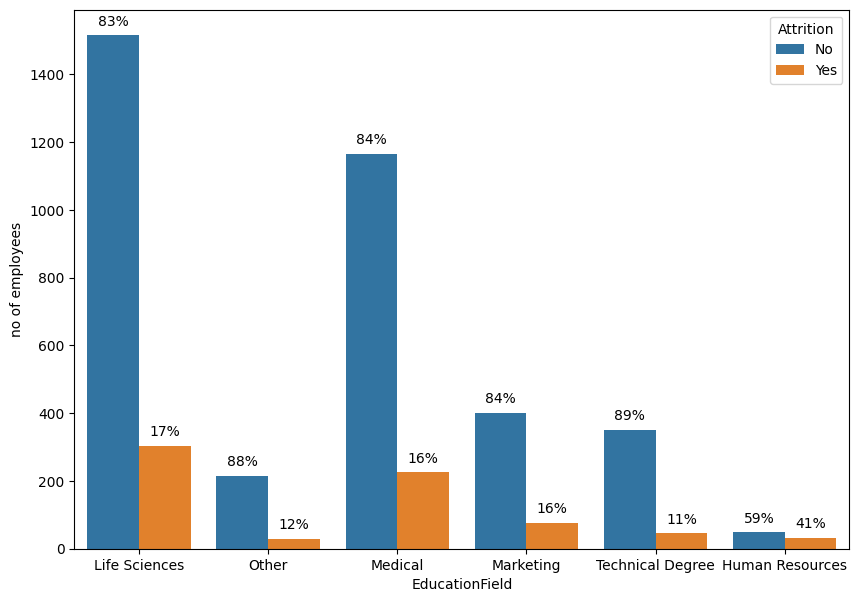

In [ ]:
plt.figure(figsize=(10,7))
plot=sns.countplot(x='EducationField',hue='Attrition',data=hr_data)
plot.set_ylabel('no of employees')
bars=plot.patches
half=int(len(bars)/2)
right_bar=bars[:half]
left_bar=bars[half:]
for right,left in zip(right_bar,left_bar):
  height_r=right.get_height()
  height_l=left.get_height()
  total=height_r+height_l
  percentage_r=height_r/total
  percentage_l=height_l/total
  plot.text(right.get_x()+right.get_width()/2.,height_r+30,'{0:.0%}'.format(percentage_r),ha='center')
  plot.text(left.get_x()+left.get_width()/2.,height_l+30,'{0:.0%}'.format(percentage_l),ha='center')

**Insights from plot**
* most attrition is from human resources education field in previous year. 59% percentage of employees stayed in the company and 41% left, which is almost of half of employees from that education field left the company.
* 89% of employees stayed and 11% of employees left the company from Technical degree education field
* 84% employees stayed and 16% employees left the company from Marketing field and Medical field in previous year
* 83% of employees stayed and 17% of employees left the company were from life sciences eduction field
* 88% of employees stayed and 12% employees left the company who are from other education fields.

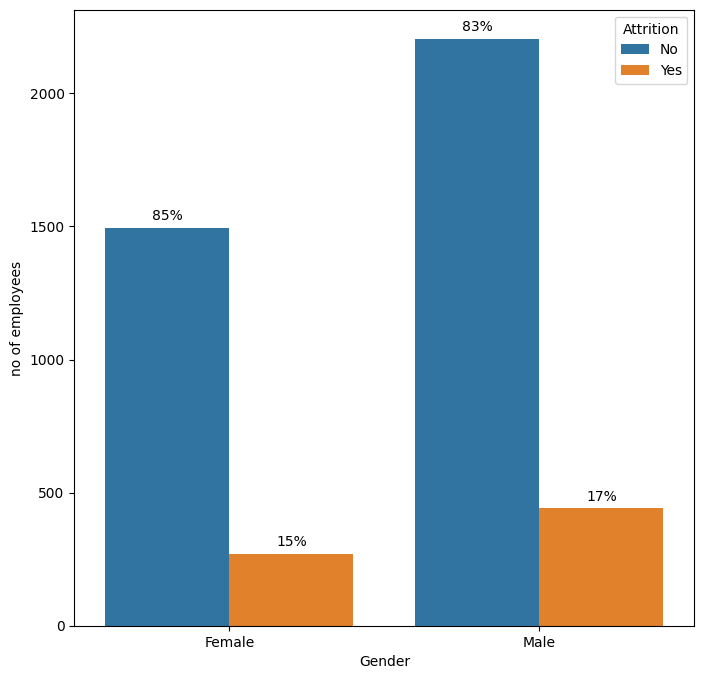

In [ ]:
plt.figure(figsize=(8,8))
plot=sns.countplot(x='Gender',hue='Attrition',data=hr_data)
plot.set_ylabel('no of employees')
bars=plot.patches
half=int(len(bars)/2)
left_bar=bars[:half]
right_bar=bars[half:]
for left,right in zip(left_bar,right_bar):
  height_l=left.get_height()
  height_r=right.get_height()
  total=height_l+height_r
  percentage_l=height_l/total
  percentage_r=height_r/total
  plot.text(left.get_x()+left.get_width()/2.,height_l+30,'{0:.0%}'.format(percentage_l),ha='center')
  plot.text(right.get_x()+right.get_width()/2.,height_r+30,'{0:.0%}'.format(percentage_r),ha='center')

**Insights from plot**
* Attrition rate of male and female employees are almost similar, hence it might not have a significant impact

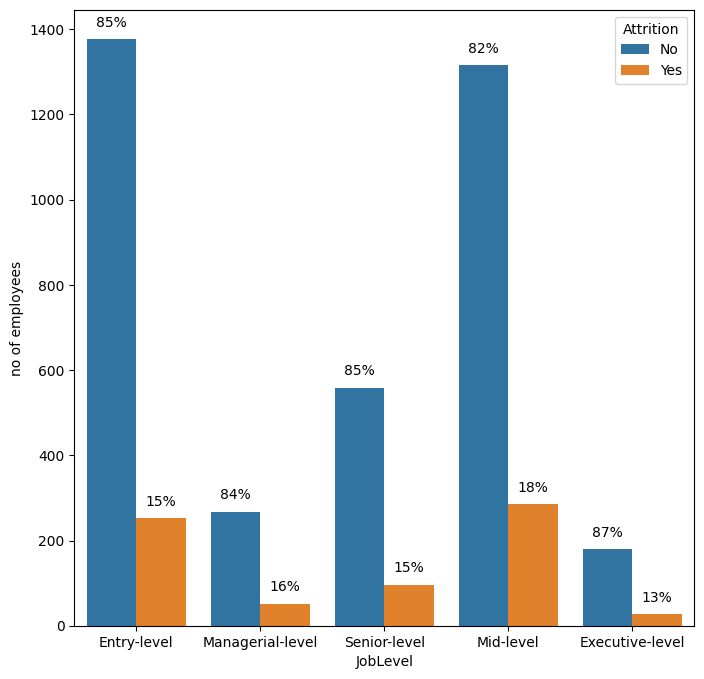

In [ ]:
plt.figure(figsize=(8,8))
plot=sns.countplot(x='JobLevel',hue='Attrition',data=hr_data)
plot.set_ylabel('no of employees')
bars=plot.patches
half=int(len(bars)/2)
left_bar=bars[:half]
right_bar=bars[half:]
for left,right in zip(left_bar,right_bar):
  height_l=left.get_height()
  height_r=right.get_height()
  total=height_l+height_r
  percentage_l=height_l/total
  percentage_r=height_r/total
  plot.text(left.get_x()+left.get_width()/2.,height_l+30,'{0:.0%}'.format(percentage_l),ha='center')
  plot.text(right.get_x()+right.get_width()/2.,height_r+30,'{0:.0%}'.format(percentage_r),ha='center')

**Insights from the plot**
* Joblevel of the employee might not have significant impact on the attrition rate in the previous year data.
* but we can still say that less employee attrition from executive-level in previous year and more attrition from mid-level when compared to other job levels

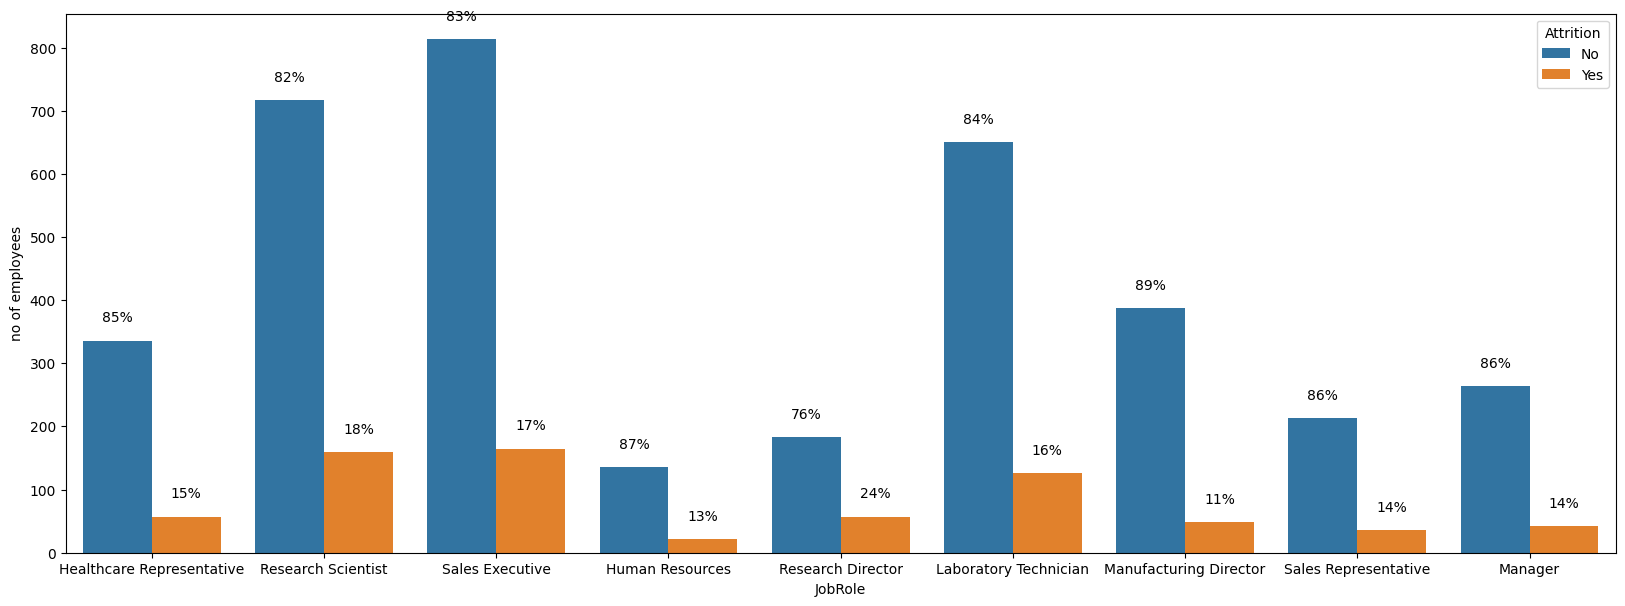

In [ ]:
plt.figure(figsize=(20,7))
plot=sns.countplot(x='JobRole',hue='Attrition',data=hr_data)
plot.set_ylabel('no of employees')
bars=plot.patches
half=int(len(bars)/2)
left_bar=bars[:half]
right_bar=bars[half:]
for left,right in zip(left_bar,right_bar):
  height_l=left.get_height()
  height_r=right.get_height()
  total=height_l+height_r
  percentage_l=height_l/total
  percentage_r=height_r/total
  plot.text(left.get_x()+left.get_width()/2.,height_l+30,'{0:.0%}'.format(percentage_l),ha='center')
  plot.text(right.get_x()+right.get_width()/2.,height_r+30,'{0:.0%}'.format(percentage_r),ha='center')

In [ ]:
hr_data.groupby('JobRole') ['JobRole'].count()

JobRole
Healthcare Representative    393
Human Resources              156
Laboratory Technician        776
Manager                      306
Manufacturing Director       435
Research Director            240
Research Scientist           876
Sales Executive              978
Sales Representative         249
Name: JobRole, dtype: int64

**Insights from the plot**
* JobRole of the employee might not have significant impact on the attrition rate in the previous year data, but more attrition rate was in Research director Role compared to other job roles

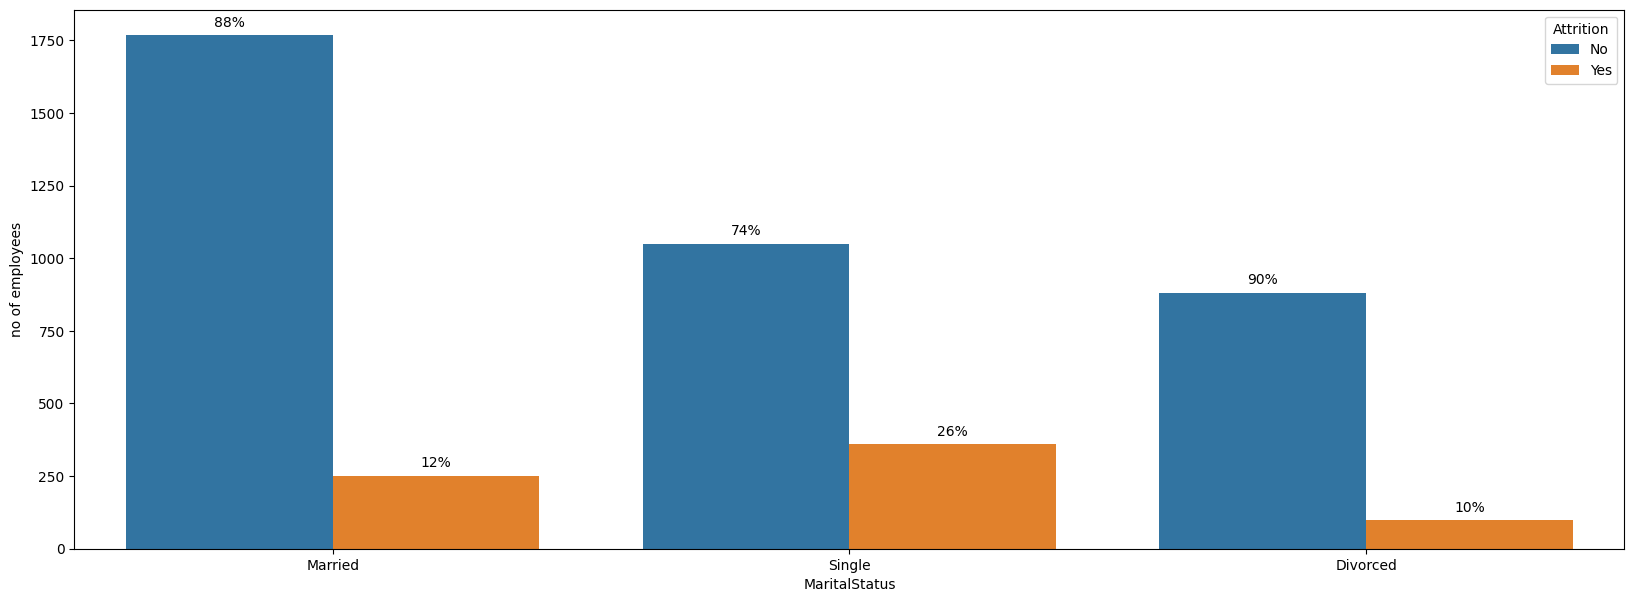

In [ ]:
plt.figure(figsize=(20,7))
plot=sns.countplot(x='MaritalStatus',hue='Attrition',data=hr_data)
plot.set_ylabel('no of employees')
bars=plot.patches
half=int(len(bars)/2)
left_bar=bars[:half]
right_bar=bars[half:]
for left,right in zip(left_bar,right_bar):
  height_l=left.get_height()
  height_r=right.get_height()
  total=height_l+height_r
  percentage_l=height_l/total
  percentage_r=height_r/total
  plot.text(left.get_x()+left.get_width()/2.,height_l+30,'{0:.0%}'.format(percentage_l),ha='center')
  plot.text(right.get_x()+right.get_width()/2.,height_r+30,'{0:.0%}'.format(percentage_r),ha='center')

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

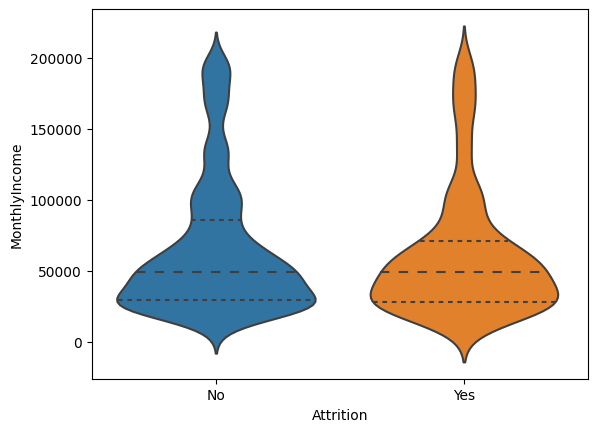

In [ ]:
sns.violinplot(y='MonthlyIncome',x='Attrition',data=hr_data,inner='quartiles')

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

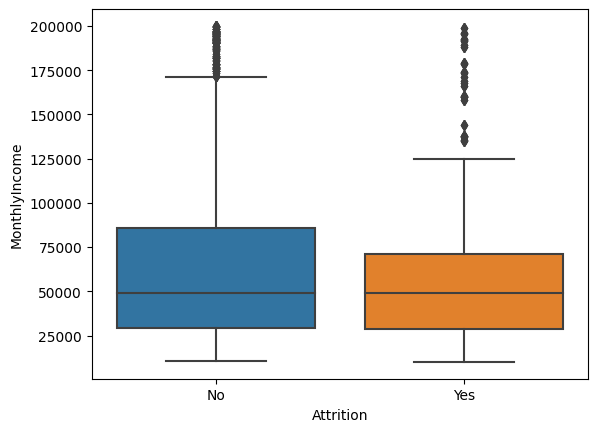

In [ ]:
sns.boxplot(y='MonthlyIncome',x='Attrition',data=hr_data)

**Insights from plot**
* employees who has salary less than 75000 has high attrition rate. from the graph we can understand that median of attrition-yes is 50000 and IQR range between 25000 to 75000

<Axes: xlabel='Attrition', ylabel='NumCompaniesWorked'>

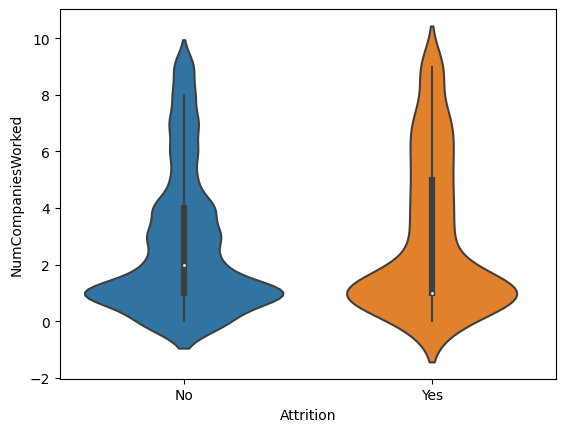

In [ ]:
sns.violinplot(y='NumCompaniesWorked',x='Attrition',data=hr_data)

**Insights from the plot**
* Majority of the employees who left the company last year are those who has worked in 0 to 2 companies in their career.
* the violins for both "Yes" and "No" attrition are almost similar in shape and position, it might suggest that the number of companies worked doesn't strongly influence attrition.

<Axes: xlabel='Attrition', ylabel='PercentSalaryHike'>

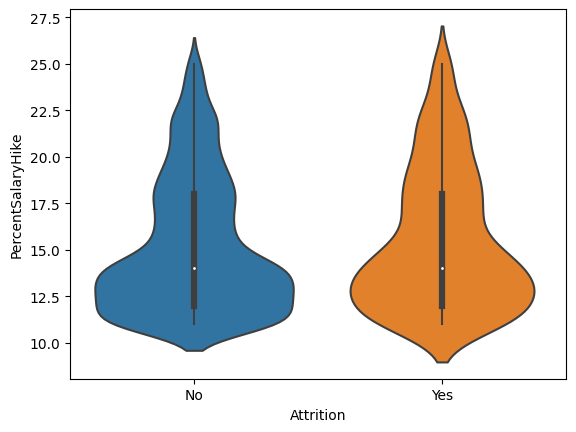

In [ ]:
sns.violinplot(y='PercentSalaryHike',x='Attrition',data=hr_data)

In [ ]:
hr_data.groupby('StockOptionLevel') ['StockOptionLevel'].count()

StockOptionLevel
0    1892
1    1788
2     474
3     255
Name: StockOptionLevel, dtype: int64

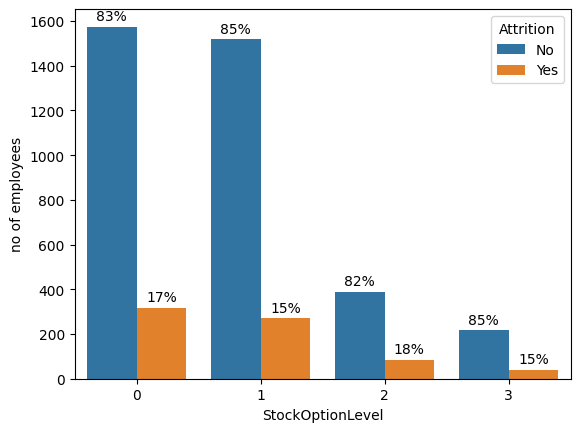

In [ ]:
plot=sns.countplot(x='StockOptionLevel',hue='Attrition',data=hr_data)
plot.set_ylabel('no of employees')
bars=plot.patches
half=int(len(bars)/2)
left_bar=bars[:half]
right_bar=bars[half:]
for left,right in zip(left_bar,right_bar):
 height_l=left.get_height()
 height_r=right.get_height()
 total=height_l+height_r
 percentage_l=height_l/total
 percentage_r=height_r/total
 plot.text(left.get_x()+left.get_width()/2.,height_l+30,'{0:.0%}'.format(percentage_l),ha='center')
 plot.text(right.get_x()+right.get_width()/2.,height_r+30,'{0:.0%}'.format(percentage_r),ha='center')

**Insights from plot**
* from the plot its clear that StockOptionLevel doesn't really have much impact on the attrition level of the employees

<Axes: xlabel='Attrition', ylabel='TotalWorkingYears'>

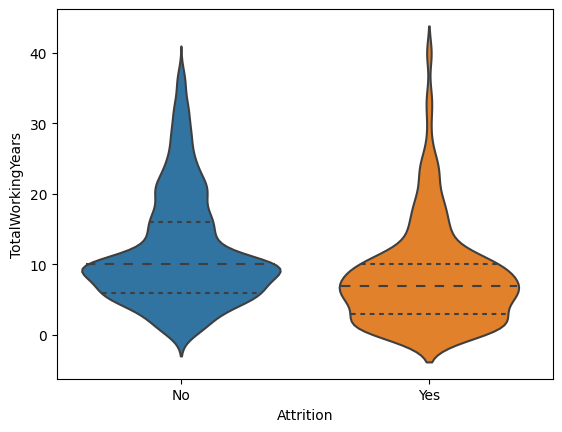

In [ ]:
sns.violinplot(x='Attrition',y='TotalWorkingYears',data=hr_data,inner='quartiles')

**Insights from the plot**
* Attrition rate is higher in employees tho who has worked in the company for less than 12 years. Median is 8 years and IQR ranges between 3 to 10
* since the violin plots looks somwhat similar it indicates the lack of strong association between attrition and total working years.

<Axes: xlabel='Attrition', ylabel='TrainingTimesLastYear'>

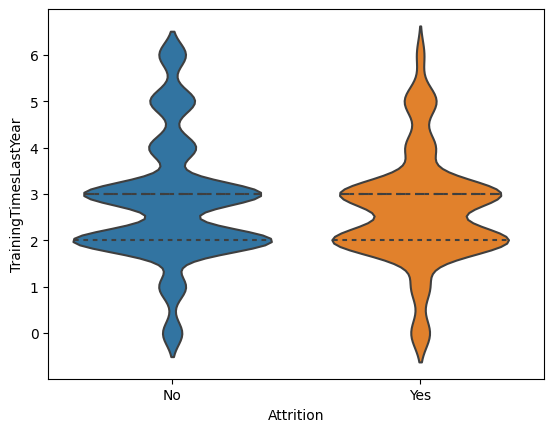

In [ ]:
sns.violinplot(x='Attrition',y='TrainingTimesLastYear',data=hr_data,inner='quartiles')

**Insights from the plot**
* since the violin plots looks somwhat similar it indicates the lack of strong association between attrition and Training times last year.

<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

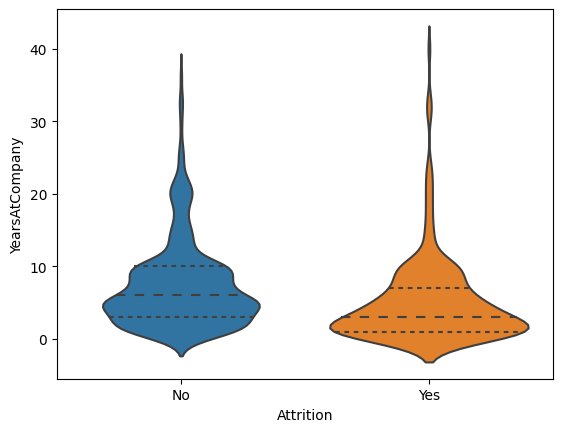

In [ ]:
sns.violinplot(x='Attrition',y='YearsAtCompany',data=hr_data,inner='quartiles')

<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

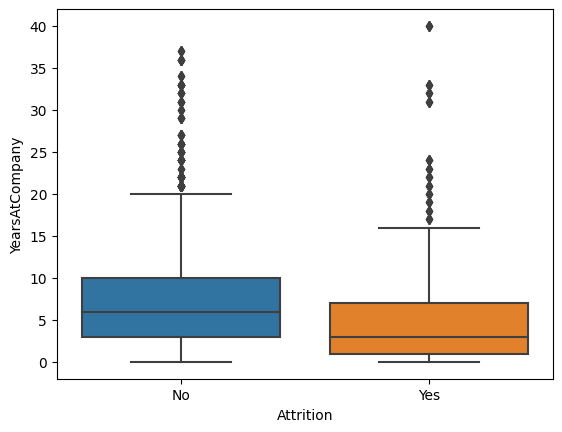

In [ ]:
sns.boxplot(x='Attrition',y='YearsAtCompany',data=hr_data)

**Insights from the plot**
* Employees who left the company previous are majority has experience of less than 8 years in the company. from the plot for attrition-yes, Median is 3 and IQR ranges between 3 to 8.

<Axes: xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

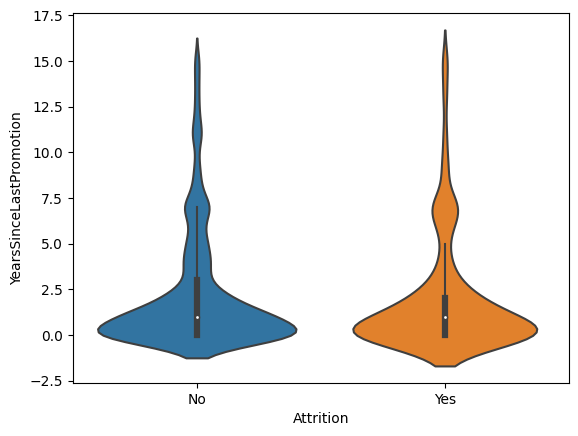

In [ ]:
sns.violinplot(x='Attrition',y='YearsSinceLastPromotion',data=hr_data)

**Insights from the plot**

* since the violin plots looks somwhat similar it indicates the lack of strong association between attrition and years since last promotion.

<Axes: xlabel='Attrition', ylabel='YearsWithCurrManager'>

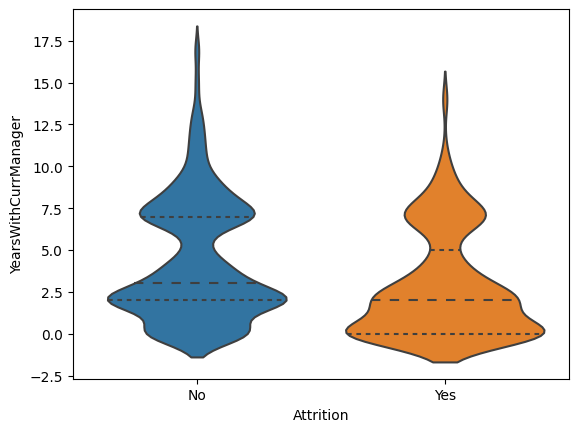

In [ ]:
sns.violinplot(x='Attrition',y='YearsWithCurrManager',data=hr_data,inner='quartiles')

**Insights from the plot**

* Half of the employees who left the company last year are those with experience between 0 to 5 years with current manager. Median is 2.5 years
* since the violin plots looks somwhat similar it indicates the lack of strong association between attrition and years with current manager.

<Axes: xlabel='Attrition', ylabel='hrs_worked'>

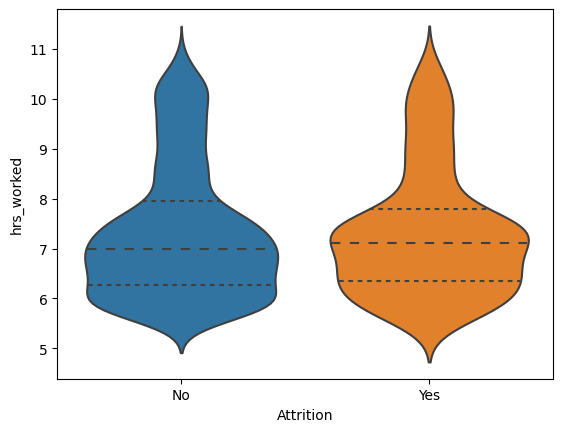

In [ ]:
sns.violinplot(x='Attrition',y='hrs_worked',data=hr_data,inner='quartiles')

**Insights from the plot**

* since the violin plots looks somwhat similar it indicates the lack of strong association between attrition and years with current manager.

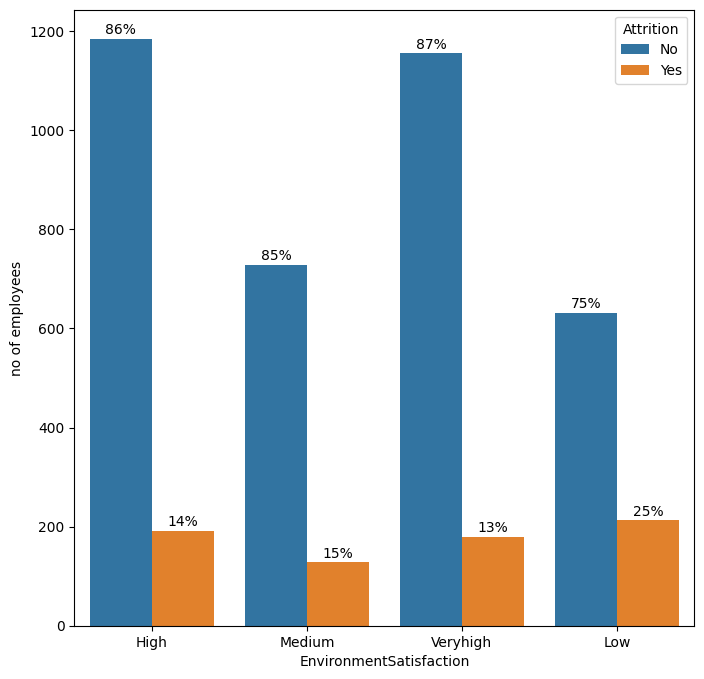

In [ ]:
plt.figure(figsize=(8,8))
plot=sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=hr_data)
plot.set_ylabel('no of employees')
bars=plot.patches
half=int(len(bars)/2)
left_bar=bars[:half]
right_bar=bars[half:]
for left,right in zip(left_bar,right_bar):
  height_l=left.get_height()
  height_r=right.get_height()
  total=height_l+height_r
  percentage_l=height_l/total
  percentage_r=height_r/total
  plot.text(left.get_x()+left.get_width()/2.,height_l+10,'{0:.0%}'.format(percentage_l),ha='center')
  plot.text(right.get_x()+right.get_width()/2.,height_r+10,'{0:.0%}'.format(percentage_r),ha='center')

In [ ]:
hr_data.groupby('EnvironmentSatisfaction') ['EnvironmentSatisfaction'].count()

EnvironmentSatisfaction
High        1375
Low          844
Medium       856
Veryhigh    1334
Name: EnvironmentSatisfaction, dtype: int64

**Insights from the plot**
* population of 1375 employees believed that the envirnoment satisfaction is high in the organization,and from them 14% ie, 192 employees left the company in previous year.
* population of 856 employees believed that the envirnoment satisfaction is Medium in the organization,and from them 15% ie, 128 employees left the company in previous year.
* population of 1334 employees believed that the envirnoment satisfaction is Very high in the organization,and from them 13% ie, 173 employees left the company in previous year.
* population of 844 employees believed that the envirnoment satisfaction is low in the organization,and from them 25% ie, 211 employees left the company in previous year.
* From total number of employees who left the company in previous year, 30% believed the Environment satisfaction is low and 27% believed Environment satisfaction is high

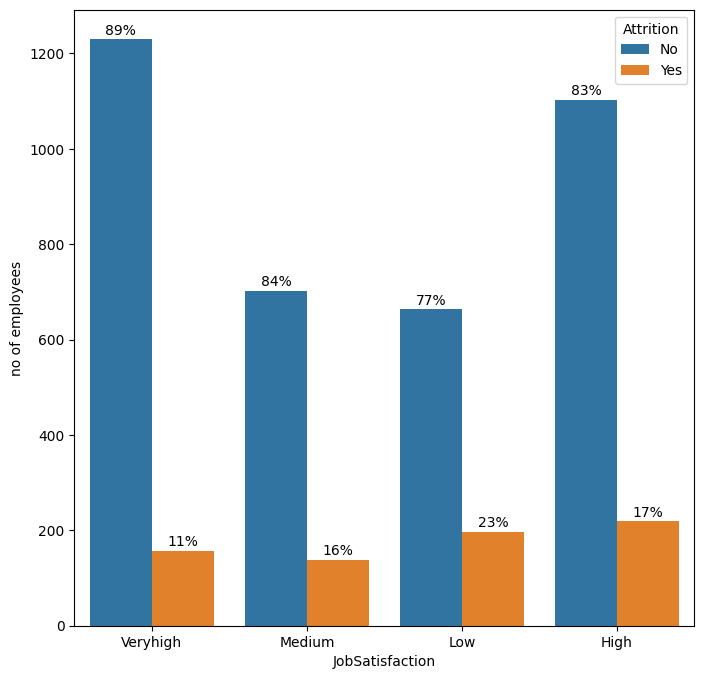

In [ ]:
plt.figure(figsize=(8,8))
plot=sns.countplot(x='JobSatisfaction',hue='Attrition',data=hr_data)
plot.set_ylabel('no of employees')
bars=plot.patches
half=int(len(bars)/2)
left_bar=bars[:half]
right_bar=bars[half:]
for left,right in zip(left_bar,right_bar):
  height_l=left.get_height()
  height_r=right.get_height()
  total=height_l+height_r
  percentage_l=height_l/total
  percentage_r=height_r/total
  plot.text(left.get_x()+left.get_width()/2.,height_l+10,'{0:.0%}'.format(percentage_l),ha='center')
  plot.text(right.get_x()+right.get_width()/2.,height_r+10,'{0:.0%}'.format(percentage_r),ha='center')

In [ ]:
hr_data.groupby('JobSatisfaction') ['JobSatisfaction'].count()

JobSatisfaction
High        1322
Low          860
Medium       840
Veryhigh    1387
Name: JobSatisfaction, dtype: int64

**Insights from the plot**
* population of 1322 employees believed that the Job satisfaction is high in the organization,and from them 11% ie, 145 employees left the company in previous year.
* population of 840 employees believed that the Job satisfaction is medium in the organization,and from them 16% ie, 134 employees left the company in previous year.
* population of 860 employees believed that the Job satisfaction is low in the organization,and from them 23% ie, 197 employees left the company in previous year.
* population of 1387 employees believed that the Job satisfaction is very high in the organization,and from them 17% ie, 235 employees left the company in previous year.

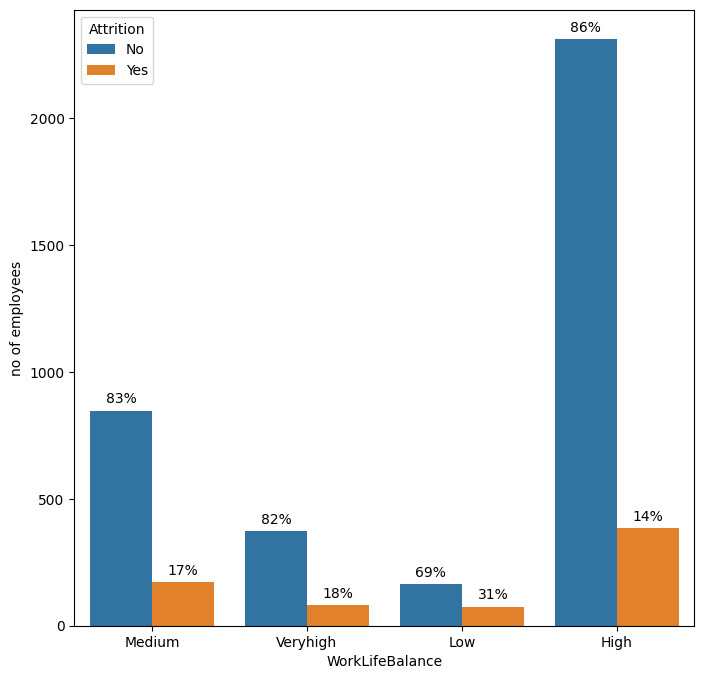

In [ ]:
plt.figure(figsize=(8,8))
plot=sns.countplot(x='WorkLifeBalance',hue='Attrition',data=hr_data)
plot.set_ylabel('no of employees')
bars=plot.patches
half=int(len(bars)/2)
left_bar=bars[:half]
right_bar=bars[half:]
for left,right in zip(left_bar,right_bar):
  height_l=left.get_height()
  height_r=right.get_height()
  total=height_l+height_r
  percentage_l=height_l/total
  percentage_r=height_r/total
  plot.text(left.get_x()+left.get_width()/2.,height_l+30,'{0:.0%}'.format(percentage_l),ha='center')
  plot.text(right.get_x()+right.get_width()/2.,height_r+30,'{0:.0%}'.format(percentage_r),ha='center')

In [ ]:
hr_data.groupby('WorkLifeBalance') ['WorkLifeBalance'].count()

WorkLifeBalance
High        2697
Low          239
Medium      1019
Veryhigh     454
Name: WorkLifeBalance, dtype: int64

**Insights from the plot**
* population of 1019 employees believed that the Worklife balance is medium in the organization,and from them 17% ie, 173 employees left the company in previous year.
* population of 454 employees believed that the Worklife balance is very high in the organization,and from them 18% ie, 81 employees left the company in previous year.
* population of 239 employees believed that the Worklife balance is low in the organization,and from them 31% ie, 74 employees left the company in previous year.
* population of 2697 employees believed that the Worklife balance is high in the organization,and from them 14% ie, 377 employees left the company in previous year.

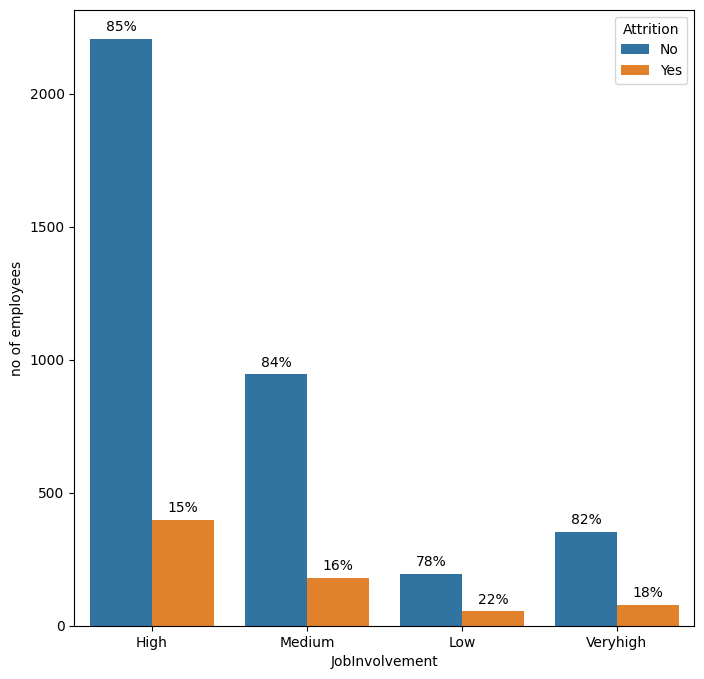

In [ ]:
plt.figure(figsize=(8,8))
plot=sns.countplot(x='JobInvolvement',hue='Attrition',data=hr_data)
plot.set_ylabel('no of employees')
bars=plot.patches
half=int(len(bars)/2)
left_bar=bars[:half]
right_bar=bars[half:]
for left,right in zip(left_bar,right_bar):
  height_l=left.get_height()
  height_r=right.get_height()
  total=height_l+height_r
  percentage_l=height_l/total
  percentage_r=height_r/total
  plot.text(left.get_x()+left.get_width()/2.,height_l+30,'{0:.0%}'.format(percentage_l),ha='center')
  plot.text(right.get_x()+right.get_width()/2.,height_r+30,'{0:.0%}'.format(percentage_r),ha='center')

In [ ]:
hr_data.groupby('JobInvolvement') ['JobInvolvement'].count()

JobInvolvement
High        2604
Low          249
Medium      1125
Veryhigh     431
Name: JobInvolvement, dtype: int64

**Insights from the plot**
* population of 2604 employees believed that the Job Involvement is high in the organization,and from them 15% ie, 390 employees left the company in previous year.
* population of 1125 employees believed that the Job Involvement is medium in the organization,and from them 16% ie, 180 employees left the company in previous year.
* population of 249 employees believed that the Job Involvement is low in the organization,and from them 22% ie, 54 employees left the company in previous year.
* population of 431 employees believed that the Job Involvement is very high in the organization,and from them 18% ie, 77 employees left the company in previous year.

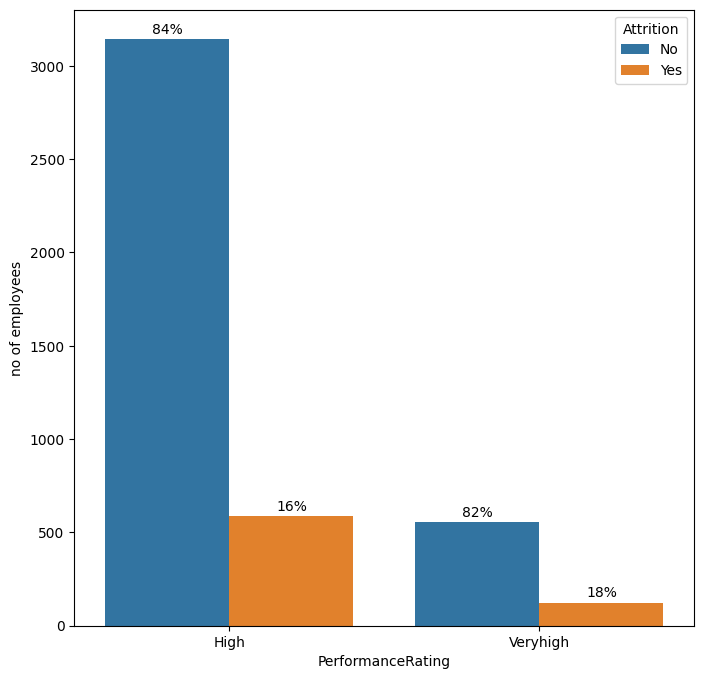

In [ ]:
plt.figure(figsize=(8,8))
plot=sns.countplot(x='PerformanceRating',hue='Attrition',data=hr_data)
plot.set_ylabel('no of employees')
bars=plot.patches
half=int(len(bars)/2)
left_bar=bars[:half]
right_bar=bars[half:]
for left,right in zip(left_bar,right_bar):
  height_l=left.get_height()
  height_r=right.get_height()
  total=height_l+height_r
  percentage_l=height_l/total
  percentage_r=height_r/total
  plot.text(left.get_x()+left.get_width()/2.,height_l+30,'{0:.0%}'.format(percentage_l),ha='center')
  plot.text(right.get_x()+right.get_width()/2.,height_r+30,'{0:.0%}'.format(percentage_r),ha='center')

In [ ]:
hr_data.groupby('PerformanceRating') ['PerformanceRating'].count()

PerformanceRating
High        3731
Veryhigh     678
Name: PerformanceRating, dtype: int64

**Insights from the plot**
* population of 3731 employees believed that the Performance rating is excellent in the organization,and from them 16% ie, 596 employees left the company in previous year.
* population of 678 employees believed that the Performance rating is Out-standing in the organization,and from them 18% ie, 122 employees left the company in previous year.

<ipython-input-237-4bc1b1209adb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hr_data.corr(),annot=True,cmap='Accent')


<Axes: >

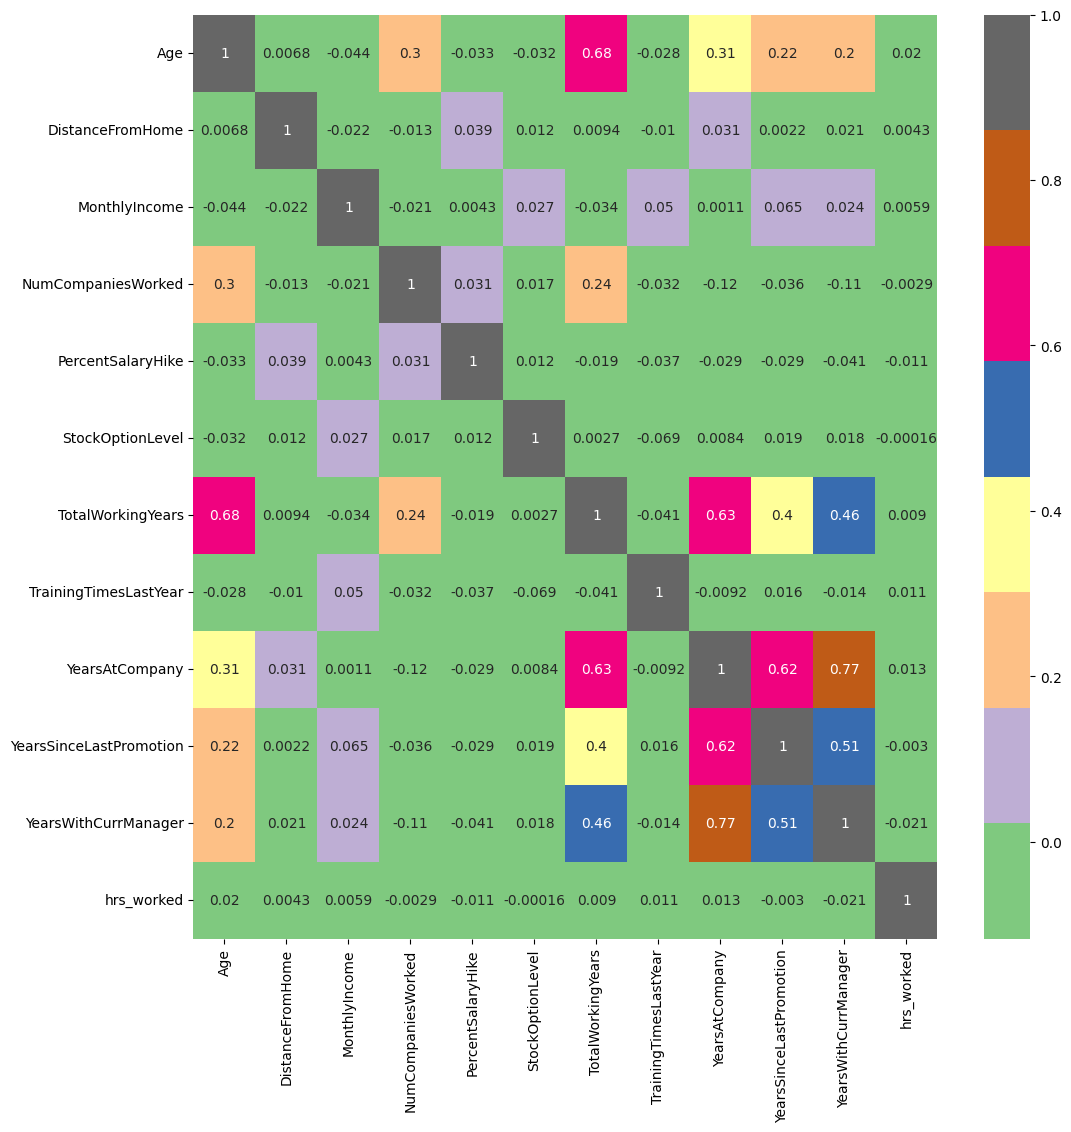

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(hr_data.corr(),annot=True,cmap='Accent')

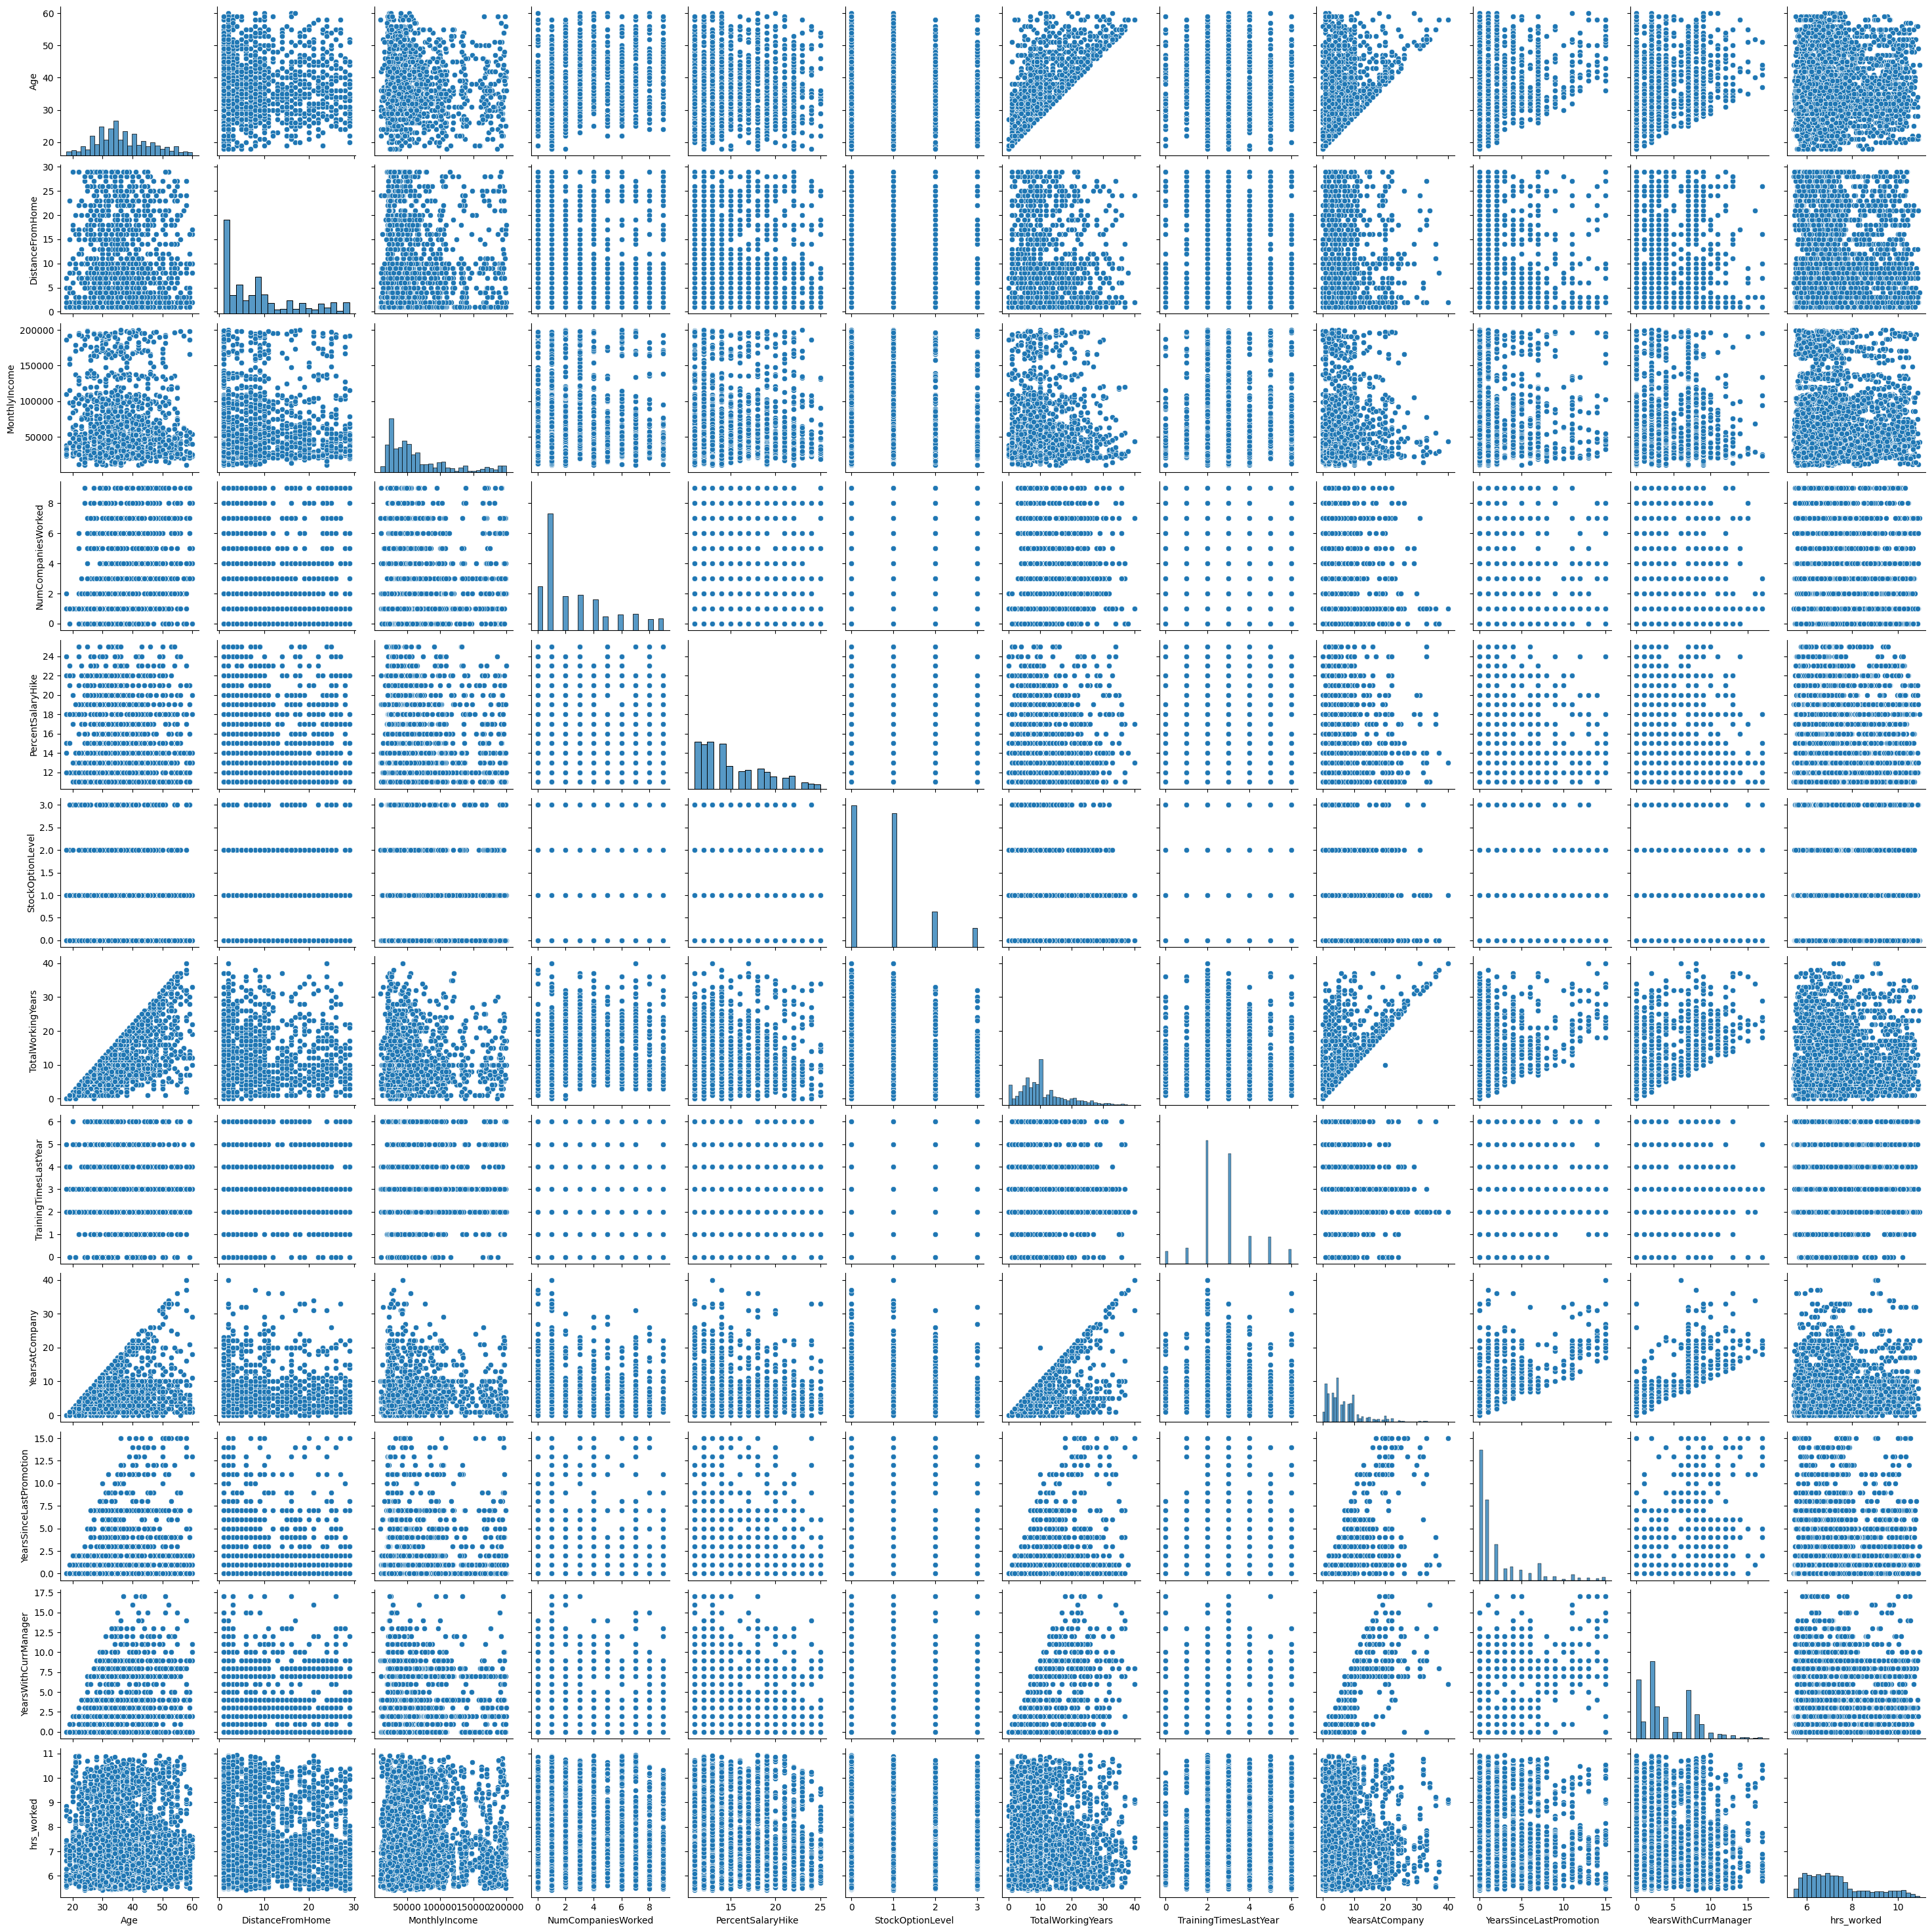

In [ ]:
sns.pairplot(hr_data)

In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4409 non-null   int64  
 1   Attrition                4409 non-null   object 
 2   BusinessTravel           4409 non-null   object 
 3   Department               4409 non-null   object 
 4   DistanceFromHome         4409 non-null   int64  
 5   Education                4409 non-null   object 
 6   EducationField           4409 non-null   object 
 7   Gender                   4409 non-null   object 
 8   JobLevel                 4409 non-null   object 
 9   JobRole                  4409 non-null   object 
 10  MaritalStatus            4409 non-null   object 
 11  MonthlyIncome            4409 non-null   int64  
 12  NumCompaniesWorked       4409 non-null   float64
 13  PercentSalaryHike        4409 non-null   int64  
 14  StockOptionLevel        

In [ ]:
hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'hrs_worked'],
      dtype='object')

**Encoding**

In [ ]:
dummies=pd.get_dummies(hr_data[['BusinessTravel','Department','Education','EducationField','Gender','JobLevel','JobRole',
                                'MaritalStatus','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating']])
hr=pd.concat([hr_data,dummies],axis=1)
hr.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

       Education EducationField  Gender          JobLevel  \
0        College  Life Sciences  Female       Entry-level   
1  Below college  Life Sciences  Female       Entry-level   
2         Master          Other    Male  Managerial-level   
3         Doctor  Life Sciences    Male      Senior-level   
4  Below college        Medical    Male       Entry-level   

                     JobRole MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0  Healthcare Representative       Married         131160                 1.0   
1         Research Scientist        Single          41890                 0.0   
2            Sales Executive       Married         193280                 1.0   
3            Human Resources       Married          83210                 3.0   
4            Sales Executive        Single          23420                 4.0   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 11                 0                1.0   
1                 23                 1                6.0   
2                 15                 3                5.0   
3                 11                 3               13.0   
4                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager EnvironmentSatisfaction JobSatisfaction  \
0                     0                    High        Veryhigh   
1                     4                    High          Medium   
2                     3                  Medium          Medium   
3                     5                Veryhigh        Veryhigh   
4                     4                Veryhigh             Low   

  WorkLifeBalance JobInvolvement PerformanceRating  hrs_worked  \
0          Medium           High              High    7.315971   
1        Veryhigh         Medium          Veryhigh    6.816081   
2             Low           High              High    6.789215   
3            High         Medium              High    7.877561   
4            High           High              High   10.275802   

   BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                          0                                 0   
1                          0                                 1   
2                          0                                 1   
3                          1                                 0   
4                          0                                 0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                             1                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             1                           0   

   Department_Research & Development  Department_Sales  Education_Bachelor  \
0                                  0                 1                   0   
1                                  1                 0                   0   
2                                  1                 0                

**Dropping duplicate columns**

In [ ]:
hr=hr.drop(['BusinessTravel','Department','Education','EducationField','Gender','JobLevel','JobRole','MaritalStatus','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating'],axis=1)

In [ ]:
hr.head()

Age Attrition  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
0   51        No                 6         131160                 1.0   
1   31       Yes                10          41890                 0.0   
2   32        No                17         193280                 1.0   
3   38        No                 2          83210                 3.0   
4   32        No                10          23420                 4.0   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                 11                 0                1.0   
1                 23                 1                6.0   
2                 15                 3                5.0   
3                 11                 3               13.0   
4                 12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  hrs_worked  BusinessTravel_Non-Travel  \
0                     0    7.315971                          0   
1                     4    6.816081                          0   
2                     3    6.789215                          0   
3                     5    7.877561                          1   
4                     4   10.275802                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 1                             0   
3                                 0                             0   
4                                 0                             1   

   Department_Human Resources  Department_Research & Development  \
0                           0                                  0   
1                           0                                  1   
2                           0                                  1   
3                           0                                  1   
4                           0                                  1   

   Department_Sales  Education_Bachelor  Education_Below college  \
0                 1                   0                        0   
1                 0                   0                        1   
2                 0                   0                        0   
3                 0                   0                        0   
4                 0                   0                        1   

   Education_College  Education_Doctor  Education_Master  \
0                  1                 0                 0   
1                  0                 0                 0   
2                  0                 0                 1   
3                  0                 1                 0   
4                  0                 0                 0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                               0                             1   
1                               0                             1   
2                               0                             0   
3                               0                             1   
4                               0                             0   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                         0                       0                     0   
1                         0                       0                     0   
2                         0                       0                     1   
3                         0                       0                     0   
4  

In [ ]:
hr['Attrition']=hr['Attrition'].replace({'Yes':1,'No':0})

In [ ]:
hr.shape

(4409, 67)

**Train-Test Split**

In [ ]:
x=hr.drop(['Attrition'],axis=1)
x.shape

(4409, 66)

In [ ]:
y=hr['Attrition']
y.shape

(4409,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
x_train.head()

Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
1611   31                24          44400                 1.0   
2822   32                 2          41480                 7.0   
549    38                 6          47360                 0.0   
557    21                 1          26100                 1.0   
1842   22                 2          11020                 6.0   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
1611                 13                 1                4.0   
2822                 15                 0               10.0   
549                  11                 1                9.0   
557                  11                 1                2.0   
1842                 19                 0                4.0   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
1611                      2               4                        3   
2822                      0               5                        0   
549                       3               8                        2   
557                       3               2                        2   
1842                      3               2                        2   

      YearsWithCurrManager  hrs_worked  BusinessTravel_Non-Travel  \
1611                     2    8.436611                          0   
2822                     4    6.963504                          0   
549                      7    5.841194                          0   
557                      2    5.796997                          0   
1842                     2   10.903669                          0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
1611                                 0                             1   
2822                                 0                             1   
549                                  0                             1   
557                                  0                             1   
1842                                 0                             1   

      Department_Human Resources  Department_Research & Development  \
1611                           0                                  1   
2822                           0                                  1   
549                            0                                  1   
557                            0                                  1   
1842                           0                                  1   

      Department_Sales  Education_Bachelor  Education_Below college  \
1611                 0                   0                        1   
2822                 0                   0                        0   
549                  0                   0                        0   
557                  0                   0                        0   
1842                 0                   0                        0   

      Education_College  Education_Doctor  Education_Master  \
1611                  0                 0                 0   
2822                  0                 0                 1   
549                   1                 0                 0   
557                   0                 0                 1   
1842                  1                 0                 0   

      EducationField_Human Resources  EducationField_Life Sciences  \
1611                               0                             0   
2822                               0                             1   
549                                0                             0   
557                                0                             1   
1842                               0                             1   

      EducationField_Marketing  EducationField_Medical  EducationField_Other  \
1611                         0                       1                     0   
2822                         0                       0                     0   
549                          0                   

In [ ]:
x_train.shape

(3086, 66)

In [ ]:
x_test.head()

Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
2983   18                 7          38120                 1.0   
1499   38                 2          44480                 9.0   
4112   38                20          20290                 3.0   
478    48                 3          54150                 7.0   
530    28                 1          74570                 3.0   

      PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
2983                 15                 0                0.0   
1499                 12                 0               10.0   
4112                 11                 1               20.0   
478                  11                 1               27.0   
530                  11                 2               10.0   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
2983                      3               0                        0   
1499                      3               2                        1   
4112                      3              18                        1   
478                       1              15                        4   
530                       1               8                        1   

      YearsWithCurrManager  hrs_worked  BusinessTravel_Non-Travel  \
2983                     0    6.854813                          0   
1499                     2    9.460331                          0   
4112                    11    7.550871                          0   
478                      8    6.589684                          0   
530                      7    5.991241                          0   

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
2983                                 0                             1   
1499                                 0                             1   
4112                                 0                             1   
478                                  0                             1   
530                                  0                             1   

      Department_Human Resources  Department_Research & Development  \
2983                           0                                  0   
1499                           0                                  0   
4112                           0                                  0   
478                            0                                  0   
530                            0                                  1   

      Department_Sales  Education_Bachelor  Education_Below college  \
2983                 1                   1                        0   
1499                 1                   1                        0   
4112                 1                   0                        0   
478                  1                   1                        0   
530                  0                   1                        0   

      Education_College  Education_Doctor  Education_Master  \
2983                  0                 0                 0   
1499                  0                 0                 0   
4112                  0                 0                 1   
478                   0                 0                 0   
530                   0                 0                 0   

      EducationField_Human Resources  EducationField_Life Sciences  \
2983                               0                             1   
1499                               0                             0   
4112                               0                             0   
478                                0                             0   
530                                0                             1   

      EducationField_Marketing  EducationField_Medical  EducationField_Other  \
2983                         0                       0                     0   
1499                         1                       0                     0   
4112                         0                   

In [ ]:
x_test.shape

(1323, 66)

In [ ]:
y_train.head()

1611    0
2822    1
549     0
557     0
1842    0
Name: Attrition, dtype: int64

In [ ]:
y_train.shape

(3086,)

In [ ]:
y_test.head()

2983    0
1499    0
4112    0
478     0
530     0
Name: Attrition, dtype: int64

In [ ]:
y_test.shape

(1323,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
knn1=KNeighborsClassifier()
param={'n_neighbors':[3,5,7,9]}
clf=GridSearchCV(knn1,param,cv=10,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_neighbors': 3}


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
knn=KNeighborsClassifier(n_neighbors=3)
nb=GaussianNB()
svm_model=SVC()
DT=DecisionTreeClassifier(criterion='entropy')
RF=RandomForestClassifier(criterion='entropy',random_state=0)
lst=[knn,nb,svm_model,DT,RF]

KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifier(n_neighbors=3)
Accuracy_score:
0.8805744520030234
******************************
KNeighborsClassifier(n_neighbors=3) Classification_report:

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1120
           1       0.60      0.65      0.62       203

    accuracy                           0.88      1323
   macro avg       0.77      0.78      0.78      1323
weighted avg       0.88      0.88      0.88      1323

******************************
KNeighborsClassifier(n_neighbors=3) Confusion Matrix:

[[1034   86]
 [  72  131]]
******************************
KNeighborsClassifier(n_neighbors=3) Confusion matrix display:

*******************************
GaussianNB()
GaussianNB()
Accuracy_score:
0.780045351473923
******************************
GaussianNB() Classification_report:

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1120

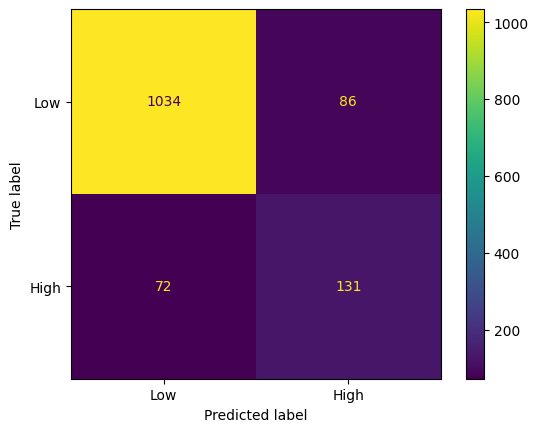

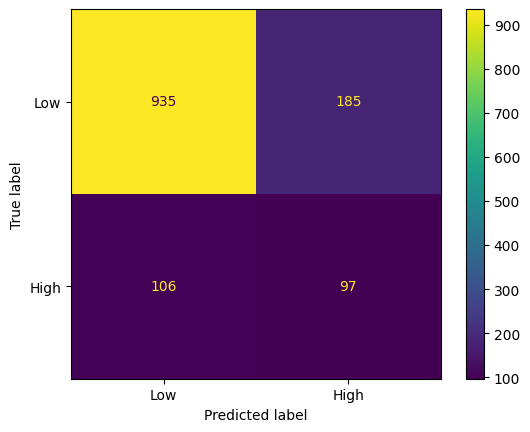

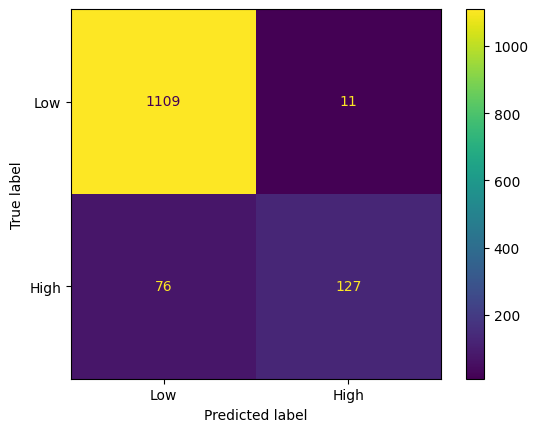

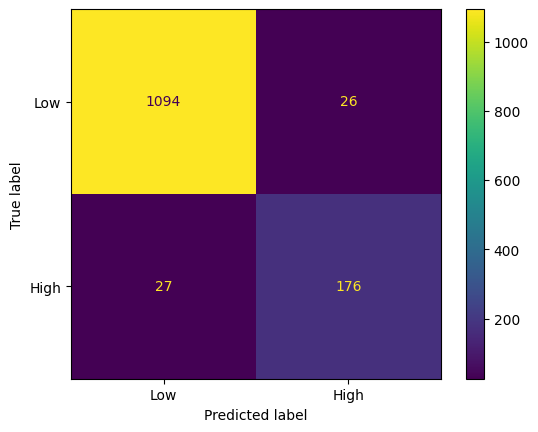

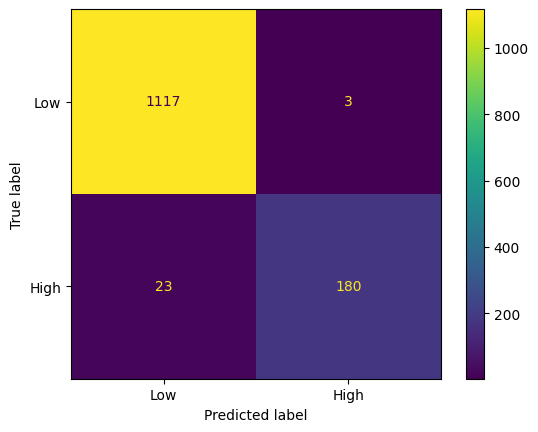

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
labels=['Low','High']
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(i)
  print('Accuracy_score:')
  print(accuracy_score(y_test,y_pred))
  print('******************************')
  print(i,'Classification_report:\n')
  print(classification_report(y_test,y_pred))
  print('******************************')
  print(i,'Confusion Matrix:\n')
  cm=confusion_matrix(y_test,y_pred)
  print(cm)
  print('******************************')
  print(i,'Confusion matrix display:\n')
  print(ConfusionMatrixDisplay(cm,display_labels=labels).plot())
  print('*******************************')

**Documentation and Reporting:**

Data Source: Kaggle,originally created by IBM as a synthetic dataset with 1470 records - https://github.com/IBM/employee-attrition-aif360/blob/master/data/emp_attrition.csv.

Handling Missing Values: Used median and mode with the help of boxplot to fill missing values in Environment Satisfaction,Job Satisfaction,Work Life Balance,No of companies worked,TotalWorking years

Model: used five of Classification Algorithm models-KNN,Naive_Bayes,SVM,Decision Trees,Random Forest

Training Process: Trained on 80% of the data with 10-fold cross-validation for KNN.

**Final Testing and Validation:**

Used Accuracy_score,classification report and confusion matrix to check the validity and accuracy of the models.**Random Forest Algorithm got highest accuracy score and Naive_bayes algorithm got the lowest**

**Conclusion and Knowledge Sharing:**

**Project Summary:**

In this project, an in-depth analysis of employee attrition within the organization based on a population of almost 4000 employees. The primary objective was to gain insights into the factors contributing to attrition and to identify patterns that can help in addressing this issue proactively. The analysis revealed several key findings:

**Attrition Rates by Performance Rating and Job Involvement:**
- Employees who believed they had an "excellent" performance rating showed a high level of attrition, with 16% leaving the company in the previous year.
- Similarly, employees who perceived their performance as "outstanding" had an attrition rate of 18%.
- Job involvement also played a significant role, with high job involvement employees experiencing a 15% attrition rate, while very low job involvement employees had an attrition rate of 22%.

**Attrition Rates by Work-Life Balance and Job Satisfaction:**
- Employees reporting "low" work-life balance had a notably high attrition rate of 31%.
- "Low" job satisfaction also correlated with a high attrition rate of 23%.
- Conversely, employees with "very high" work-life balance and job satisfaction had lower attrition rates of 18% and 17%, respectively.

**Attrition and Environment Satisfaction:**
- There was a strong association between attrition and environment satisfaction. 30% of employees who left the company believed that environment satisfaction was "low.

**Years with Current Manager:**
- Half of the employees who left the company last year had between 0 to 5 years of experience with their current manager, with a median of 2.5 years. This indicates that there is no strong association between attrition and years with the current manager.

**Attrition by Education Field:**
- Human resources education field experienced the highest attrition rate, with 41% of employees leaving.
- Technical degree and other education fields had lower attrition rates of 11% and 12%, respectively.

**Attrition by Department:**
- Human resources department had the highest attrition rate at 30%, followed by research and development (16%) and sales (15%).

**Attrition and Business Travel:**
- Employees who had to travel frequently for business purposes had a higher attrition rate (25%) compared to those who traveled rarely (15%).
- Notably, 92% of employees who didn't have to travel for business purposes chose to stay with the company.

**Age and Attrition:**
- The analysis showed that employees in the age group of 28 to 39 were more likely to leave the company, with a median age of 33 for attrition cases.
- The most common age at which employees left the company was around 33 years old.

These findings provide valuable insights into the factors associated with employee attrition in the organization. The results suggest that addressing work-life balance, job satisfaction, and environment satisfaction may help reduce attrition rates. Additionally, targeted retention efforts for employees in specific education fields and departments may prove effective. It is important to note that the analysis also highlights the potential vulnerability of employees within the age range of 28 to 39. Overall, this project equips us with actionable insights to mitigate attrition and improve employee retention within the organization.